In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
!pip install scorecardpy
import scorecardpy as sc
import pprint
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 125.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 47.1 MB/s eta 0:00:00
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60655 sha256=45ffea90bbb69383200959f98d4d56dafd18a198ec1e22adcc4f4738518d87e9
  Stored in directory: /root/.cache/pip/wheels/0b/56/c9/0233a5d8a04fbc9b49bac25e219c71daba6793fc238caa38b3
Successfully built scorecardpy

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
#!pip3 install pandas==1.3.5
#!pip install scorecardpy==0.1.9.3
# !pip install ipython
# # after downloading, restart your kernel
# !pip install git+https://github.com/ShichenXie/scorecardpy.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 125.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement scorecardpy==0.1.9.3 (from versions: 0.1.4, 0.1.5, 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.1.9.1.1, 0.1.9.2, 0.1.9.6, 0.1.9.7)
ERROR: No matching distribution found for scorecardpy==0.1.9.3

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
application_data_path = 'cleaned_app_data.csv'
bureau_data_path = 'Bureau Data.csv'

# Load data
application_df = pd.read_csv(application_data_path)
bureau_df = pd.read_csv(bureau_data_path)

# Define aggregation dictionary for Bureau data
agg_dict = {
    'DAYS_CREDIT': 'mean',
    'CREDIT_DAY_OVERDUE': 'mean',
    'DAYS_CREDIT_ENDDATE': 'mean',
    'DAYS_ENDDATE_FACT': 'mean',
    'DAYS_CREDIT_UPDATE': 'mean',
    'AMT_CREDIT_MAX_OVERDUE': 'sum',
    'CNT_CREDIT_PROLONG': 'sum',
    'AMT_CREDIT_SUM': 'sum',
    'AMT_CREDIT_SUM_DEBT': 'sum',
    'AMT_CREDIT_SUM_LIMIT': 'sum',
    'AMT_CREDIT_SUM_OVERDUE': 'sum',
    'AMT_ANNUITY': 'sum'
}

# Group by SK_ID_CURR and aggregate
bureau_agg = bureau_df.groupby('SK_ID_CURR').agg(agg_dict).reset_index()

# Merge aggregated bureau data with application data
data = application_df.merge(bureau_agg, on='SK_ID_CURR', how='left')

data

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY_y
0,7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,...,-119.500000,-1138.000000,-578.000000,0.00,0.0,990000.000,348007.50,0.00,0.0,0.0
1,22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,...,899.000000,-916.000000,-314.666667,0.00,0.0,5625000.000,3477814.38,0.00,0.0,0.0
2,33,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,...,126.625000,-636.400000,-372.111111,0.00,0.0,4489092.000,2438748.00,0.00,0.0,0.0
3,49,100056,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,...,-154.400000,-382.000000,-306.600000,17087.94,0.0,2157469.200,980784.00,0.00,0.0,49986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,307460,456199,0,Cash loans,M,Y,N,1,382500.0,745429.5,...,-1253.769231,-1418.166667,-1244.692308,13669.56,0.0,1268687.295,108517.50,0.00,0.0,0.0
15821,307477,456217,0,Cash loans,F,N,Y,0,360000.0,796396.5,...,-503.000000,-1002.250000,-430.666667,0.00,0.0,1976752.350,637492.50,0.00,0.0,168421.5
15822,307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15823,307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,...,478.769231,-1343.888889,-946.153846,30861.00,0.0,8306682.750,3094557.75,0.00,0.0,0.0


In [ ]:
#Convert DAYS_EMPLOYED to YEARS_EMPLOYED
data['YEARS_EMPLOYED'] = data['DAYS_EMPLOYED'] / -365.25
data.drop(columns='DAYS_EMPLOYED', inplace=True)

In [ ]:
def feature_engineering(data):
    
    
    # Feature: Credit income percent
    data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
    
    # Feature: Annuity income percent
    data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY_x'] / data['AMT_INCOME_TOTAL']
    
    # Feature: Credit annuity percent
    data['CREDIT_ANNUITY_PERCENT'] = data['AMT_CREDIT'] / data['AMT_ANNUITY_x']
    
    # Feature: Family count income percent
    data['FAMILY_CNT_INCOME_PERCENT'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
    
    # Feature: Credit goods difference
    data['CREDIT_GOODS_DIFF'] = data['AMT_CREDIT'] - data['AMT_GOODS_PRICE']
    
    # Feature: Age at the end of loan
    data['AGE_LOAN_FINISH'] = round(data['AGE']*(-1.0/365) + (data['AMT_CREDIT']/data['AMT_ANNUITY_x']) *(1.0/12),0)
    
    # Feature: Car age employment percent
    data['CAR_AGE_EMP_PERCENT'] = data['OWN_CAR_AGE'] / data['YEARS_EMPLOYED']
    
    #Feature: Median Income by Contract Type
    income_by_contract = data[['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE']].groupby('NAME_CONTRACT_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].map(income_by_contract)
    
    #Feature: Median Income by Housing
    income_by_housing = data[['AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE']].groupby('NAME_HOUSING_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(income_by_housing)
    
    #Feature: Median Income by Organization
    income_by_org = data[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_ORG_TYPE'] = data['ORGANIZATION_TYPE'].map(income_by_org)

    #Feature: Median Income by Occupation
    income_by_occu = data[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_OCCU_TYPE'] = data['OCCUPATION_TYPE'].map(income_by_occu)

    #Feature: Median Income by Education
    income_by_education = data[['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE']].groupby('NAME_EDUCATION_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_EDU_TYPE'] = data['NAME_EDUCATION_TYPE'].map(income_by_education)

    #Feature: Organization Type Income Percent
    data['ORG_TYPE_INCOME_PERCENT'] = data['MEDIAN_INCOME_ORG_TYPE']/data['AMT_INCOME_TOTAL']
    
    #Feature: Occupation Type Income Percent
    data['OCCU_TYPE_INCOME_PERCENT'] = data['MEDIAN_INCOME_OCCU_TYPE']/data['AMT_INCOME_TOTAL']
    
    #Feature: Education Type Income Percent
    data['EDU_TYPE_INCOME_PERCENT'] = data['MEDIAN_INCOME_EDU_TYPE']/data['AMT_INCOME_TOTAL']
    
    
    return data




In [ ]:
fe_data = feature_engineering(data)
print(data.shape)

(15825, 147)


In [ ]:
fe_data.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
app_data = fe_data.copy()

In [ ]:
bins = sc.woebin(app_data, y='TARGET')

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ORGANIZATION_TYPE
>>> Continue the binning process?
1: yes 
2: no
Binning on 15825 rows and 144 columns in 00:01:23


In [ ]:
iv_data = []

for variables , bindetails in bins.items():
    iv_data.append({'variable': variables, 'iv': round(bindetails['total_iv'][0], 6)})
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

HOUSETYPE_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,HOUSETYPE_MODE,missing,5690,0.359558,5287,403,0.070826,0.198385,0.015453,0.025477,missing,True
1,HOUSETYPE_MODE,"block of flats%,%specific housing%,%terraced h...",10135,0.640442,9607,528,0.052097,-0.128697,0.010025,0.025477,"block of flats%,%specific housing%,%terraced h...",False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_MON,"[-inf,1.0)",12700,0.802528,11951,749,0.058976,0.002623,0.000006,0.011632,1.0,False
1,AMT_REQ_CREDIT_BUREAU_MON,"[1.0,2.0)",2199,0.138957,2053,146,0.066394,0.129004,0.002448,0.011632,2.0,False
2,AMT_REQ_CREDIT_BUREAU_MON,"[2.0,inf)",926,0.058515,890,36,0.038877,-0.435248,0.009178,0.011632,inf,False


----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",9578,0.605245,9047,531,0.05544,-0.062972,0.002334,0.015542,1.0,False
1,OBS_60_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",2318,0.146477,2197,121,0.05220,-0.126603,0.002221,0.015542,2.0,False
2,OBS_60_CNT_SOCIAL_CIRCLE,"[2.0,inf)",3929,0.248278,3650,279,0.07101,0.201184,0.010987,0.015542,inf,False


----------------------------------------------------------------------------------------------------
OCCU_TYPE_INCOME_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCU_TYPE_INCOME_PERCENT,"[-inf,0.6399999999999997)",1236,0.078104,1178,58,0.046926,-0.238676,0.004008,0.030116,0.6399999999999997,False
1,OCCU_TYPE_INCOME_PERCENT,"[0.6399999999999997,0.8399999999999996)",2082,0.131564,1951,131,0.062920,0.071554,0.000695,0.030116,0.8399999999999996,False
2,OCCU_TYPE_INCOME_PERCENT,"[0.8399999999999996,0.9199999999999997)",1958,0.123728,1855,103,0.052605,-0.118457,0.001648,0.030116,0.9199999999999997,False
3,OCCU_TYPE_INCOME_PERCENT,"[0.9199999999999997,1.0399999999999996)",3959,0.250174,3668,291,0.073503,0.238376,0.015803,0.030116,1.0399999999999996,False
4,OCCU_TYPE_INCOME_PERCENT,"[1.0399999999999996,1.1999999999999995)",5091,0.321706,4834,257,0.050481,-0.161899,0.007854,0.030116,1.1999999999999995,False
5,OCCU_TYPE_INCOME_PERCENT,"[1.1999999999999995,inf)",1499,0.094724,1408,91,0.060707,0.033388,0.000107,0.030116,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY_y  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY_y,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.02413,missing,True
1,AMT_ANNUITY_y,"[-inf,4000.0)",10186,0.643665,9649,537,0.052719,-0.116157,0.008252,0.02413,4000.0,False
2,AMT_ANNUITY_y,"[4000.0,74000.0)",1872,0.118294,1745,127,0.067842,0.152132,0.002929,0.02413,74000.0,False
3,AMT_ANNUITY_y,"[74000.0,inf)",2184,0.138009,2017,167,0.076465,0.281082,0.012354,0.02413,inf,False


----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORGANIZATION_TYPE,"Industry: type 10%,%Postal%,%Industry: type 6%...",1748,0.110458,1705,43,0.024600,-0.907666,0.061983,0.116782,"Industry: type 10%,%Postal%,%Industry: type 6%...",False
1,ORGANIZATION_TYPE,"Industry: type 12%,%Transport: type 2%,%Indust...",2543,0.160695,2438,105,0.041290,-0.372519,0.018964,0.116782,"Industry: type 12%,%Transport: type 2%,%Indust...",False
2,ORGANIZATION_TYPE,"Other%,%XNA%,%Trade: type 3%,%Telecom%,%Culture",2340,0.147867,2219,121,0.051709,-0.136567,0.002597,0.116782,"Other%,%XNA%,%Trade: type 3%,%Telecom%,%Culture",False
3,ORGANIZATION_TYPE,"Advertising%,%Insurance%,%Industry: type 7%,%I...",8288,0.523728,7705,583,0.070343,0.191017,0.020799,0.116782,"Advertising%,%Insurance%,%Industry: type 7%,%I...",False
4,ORGANIZATION_TYPE,"Restaurant%,%Construction%,%Trade: type 6%,%In...",906,0.057251,827,79,0.087196,0.424098,0.012438,0.116782,"Restaurant%,%Construction%,%Trade: type 6%,%In...",False


----------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_GOODS_PRICE,"[-inf,500000.0)",4061,0.256619,3726,335,0.082492,0.363494,0.039861,0.1079,500000.0,False
1,AMT_GOODS_PRICE,"[500000.0,700000.0)",2752,0.173902,2560,192,0.069767,0.182187,0.006258,0.1079,700000.0,False
2,AMT_GOODS_PRICE,"[700000.0,1350000.0)",5706,0.360569,5414,292,0.051174,-0.147535,0.007356,0.1079,1350000.0,False
3,AMT_GOODS_PRICE,"[1350000.0,inf)",3306,0.208910,3194,112,0.033878,-0.578076,0.054425,0.1079,inf,False


----------------------------------------------------------------------------------------------------
CNT_CREDIT_PROLONG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CREDIT_PROLONG,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.000663,missing,True
1,CNT_CREDIT_PROLONG,"[-inf,inf)",14242,0.899968,13411,831,0.058349,-0.008746,0.000069,0.000663,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_HOUR,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_INCOME_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_INCOME_PERCENT,"[-inf,1.8)",6176,0.390269,5722,454,0.073510,0.238478,0.024674,0.058242,1.8,False
1,CREDIT_INCOME_PERCENT,"[1.8,3.0)",5354,0.338325,5060,294,0.054912,-0.073088,0.001750,0.058242,3.0,False
2,CREDIT_INCOME_PERCENT,"[3.0,4.800000000000001)",3414,0.215735,3259,155,0.045401,-0.273296,0.014300,0.058242,4.800000000000001,False
3,CREDIT_INCOME_PERCENT,"[4.800000000000001,inf)",881,0.055671,853,28,0.031782,-0.644101,0.017517,0.058242,inf,False


----------------------------------------------------------------------------------------------------
FONDKAPREMONT_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FONDKAPREMONT_MODE,missing,8904,0.562654,8315,589,0.066150,0.125064,0.009302,0.02821,missing,True
1,FONDKAPREMONT_MODE,"org spec account%,%reg oper spec account",1222,0.077220,1175,47,0.038462,-0.446421,0.012682,0.02821,"org spec account%,%reg oper spec account",False
2,FONDKAPREMONT_MODE,"not specified%,%reg oper account",5699,0.360126,5404,295,0.051763,-0.135465,0.006227,0.02821,"not specified%,%reg oper account",False


----------------------------------------------------------------------------------------------------
LIVINGAREA_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVINGAREA_MEDI,missing,5762,0.364107,5350,412,0.071503,0.208626,0.017385,0.05851,missing,True
1,LIVINGAREA_MEDI,"[-inf,0.04)",1374,0.086825,1276,98,0.071325,0.205936,0.004035,0.05851,0.04,False
2,LIVINGAREA_MEDI,"[0.04,0.14)",5151,0.325498,4877,274,0.053194,-0.106703,0.003536,0.05851,0.14,False
3,LIVINGAREA_MEDI,"[0.14,0.26)",2100,0.132701,1999,101,0.048095,-0.212827,0.005476,0.05851,0.26,False
4,LIVINGAREA_MEDI,"[0.26,inf)",1438,0.090869,1392,46,0.031989,-0.637401,0.028078,0.05851,inf,False


----------------------------------------------------------------------------------------------------
SK_ID_CURR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,SK_ID_CURR,"[-inf,140000.0)",1776,0.112227,1668,108,0.060811,0.035205,0.000141,0.026256,140000.0,False
1,SK_ID_CURR,"[140000.0,180000.0)",1761,0.111280,1633,128,0.072686,0.226311,0.006302,0.026256,180000.0,False
2,SK_ID_CURR,"[180000.0,220000.0)",1821,0.115071,1727,94,0.051620,-0.138392,0.002074,0.026256,220000.0,False
3,SK_ID_CURR,"[220000.0,420000.0)",8892,0.561896,8351,541,0.060841,0.035737,0.000729,0.026256,420000.0,False
4,SK_ID_CURR,"[420000.0,inf)",1575,0.099526,1515,60,0.038095,-0.456372,0.017010,0.026256,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMAIL,"[-inf,1.0)",13939,0.880821,13130,809,0.058039,-0.014402,0.000182,0.001456,1.0,False
1,FLAG_EMAIL,"[1.0,inf)",1886,0.119179,1764,122,0.064687,0.101136,0.001275,0.001456,inf,False


----------------------------------------------------------------------------------------------------
APARTMENTS_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,APARTMENTS_MEDI,missing,5803,0.366698,5385,418,0.072032,0.216563,0.018933,0.046532,missing,True
1,APARTMENTS_MEDI,"[-inf,0.05)",1469,0.092828,1375,94,0.063989,0.089540,0.000774,0.046532,0.05,False
2,APARTMENTS_MEDI,"[0.05,0.07)",1188,0.075071,1137,51,0.042929,-0.331868,0.007155,0.046532,0.07,False
3,APARTMENTS_MEDI,"[0.07,0.11)",2507,0.158420,2364,143,0.057040,-0.032811,0.000168,0.046532,0.11,False
4,APARTMENTS_MEDI,"[0.11,0.19)",2397,0.151469,2279,118,0.049228,-0.188353,0.004948,0.046532,0.19,False
5,APARTMENTS_MEDI,"[0.19,0.31)",1546,0.097694,1475,71,0.045925,-0.261279,0.005950,0.046532,0.31,False
6,APARTMENTS_MEDI,"[0.31,inf)",915,0.057820,879,36,0.039344,-0.422812,0.008604,0.046532,inf,False


----------------------------------------------------------------------------------------------------
LIVINGAPARTMENTS_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVINGAPARTMENTS_AVG,missing,8940,0.564929,8358,582,0.065101,0.107950,0.006905,0.033447,missing,True
1,LIVINGAPARTMENTS_AVG,"[-inf,0.04)",891,0.056303,833,58,0.065095,0.107864,0.000687,0.033447,0.04,False
2,LIVINGAPARTMENTS_AVG,"[0.04,0.06)",1007,0.063633,961,46,0.045680,-0.266879,0.004033,0.033447,0.06,False
3,LIVINGAPARTMENTS_AVG,"[0.06,0.08)",1068,0.067488,997,71,0.066479,0.130384,0.001215,0.033447,0.08,False
4,LIVINGAPARTMENTS_AVG,"[0.08,0.12)",1340,0.084676,1274,66,0.049254,-0.187808,0.002751,0.033447,0.12,False
5,LIVINGAPARTMENTS_AVG,"[0.12,inf)",2579,0.162970,2471,108,0.041877,-0.357793,0.017854,0.033447,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,N,4773,0.301611,4496,277,0.058035,-0.014471,0.000063,0.00009,N,False
1,FLAG_OWN_REALTY,Y,11052,0.698389,10398,654,0.059175,0.006193,0.000027,0.00009,Y,False


----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",14505,0.916588,13680,825,0.056877,-0.035852,0.001160,0.011971,1.0,False
1,DEF_30_CNT_SOCIAL_CIRCLE,"[1.0,inf)",1320,0.083412,1214,106,0.080303,0.334218,0.010811,0.011971,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMIN_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMIN_MEDI,missing,8816,0.557093,8241,575,0.065222,0.109948,0.007070,0.035929,missing,True
1,FLOORSMIN_MEDI,"[-inf,0.1)",1462,0.092385,1385,77,0.052668,-0.117196,0.001205,0.035929,0.1,False
2,FLOORSMIN_MEDI,"[0.1,0.38)",3913,0.247267,3689,224,0.057245,-0.029010,0.000205,0.035929,0.38,False
3,FLOORSMIN_MEDI,"[0.38,inf)",1634,0.103254,1579,55,0.033660,-0.584759,0.027448,0.035929,inf,False


----------------------------------------------------------------------------------------------------
ANNUITY_INCOME_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ANNUITY_INCOME_PERCENT,"[-inf,0.085)",6015,0.380095,5589,426,0.070823,0.198338,0.016327,0.050503,0.085,False
1,ANNUITY_INCOME_PERCENT,"[0.085,0.1)",2028,0.128152,1900,128,0.063116,0.074876,0.000743,0.050503,0.1,False
2,ANNUITY_INCOME_PERCENT,"[0.1,0.17500000000000002)",6555,0.414218,6216,339,0.051716,-0.136427,0.007261,0.050503,0.17500000000000002,False
3,ANNUITY_INCOME_PERCENT,"[0.17500000000000002,inf)",1227,0.077536,1189,38,0.030970,-0.670827,0.026172,0.050503,inf,False


----------------------------------------------------------------------------------------------------
NONLIVINGAPARTMENTS_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAPARTMENTS_MODE,missing,9160,0.578831,8563,597,0.065175,0.109166,0.007239,0.029753,missing,True
1,NONLIVINGAPARTMENTS_MODE,"[-inf,0.0039)",3954,0.249858,3758,196,0.049570,-0.181073,0.007567,0.029753,0.0039,False
2,NONLIVINGAPARTMENTS_MODE,"[0.0039,0.0078)",1009,0.063760,950,59,0.058474,-0.006470,0.000003,0.029753,0.0078,False
3,NONLIVINGAPARTMENTS_MODE,"[0.0078,0.0195)",879,0.055545,827,52,0.059158,0.005893,0.000002,0.029753,0.0195,False
4,NONLIVINGAPARTMENTS_MODE,"[0.0195,inf)",823,0.052006,796,27,0.032807,-0.611308,0.014942,0.029753,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMIN_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMIN_MODE,missing,8816,0.557093,8241,575,0.065222,0.109948,0.007070,0.031887,missing,True
1,FLOORSMIN_MODE,"[-inf,0.25)",3855,0.243602,3637,218,0.056550,-0.041965,0.000421,0.031887,0.25,False
2,FLOORSMIN_MODE,"[0.25,0.4)",1635,0.103318,1550,85,0.051988,-0.130905,0.001672,0.031887,0.4,False
3,FLOORSMIN_MODE,"[0.4,inf)",1519,0.095987,1466,53,0.034891,-0.547547,0.022724,0.031887,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_18,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_9,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_DAY_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_DAY_OVERDUE,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.000663,missing,True
1,CREDIT_DAY_OVERDUE,"[-inf,inf)",14242,0.899968,13411,831,0.058349,-0.008746,0.000069,0.000663,inf,False


----------------------------------------------------------------------------------------------------
MEDIAN_INCOME_OCCU_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MEDIAN_INCOME_OCCU_TYPE,"[-inf,382500.0)",2923,0.184708,2677,246,0.084160,0.385334,0.032559,0.063048,382500.0,False
1,MEDIAN_INCOME_OCCU_TYPE,"[382500.0,400500.0)",2271,0.143507,2135,136,0.059886,0.018887,0.000052,0.063048,400500.0,False
2,MEDIAN_INCOME_OCCU_TYPE,"[400500.0,405000.0)",5251,0.331817,5009,242,0.046086,-0.257599,0.019674,0.063048,405000.0,False
3,MEDIAN_INCOME_OCCU_TYPE,"[405000.0,436500.0)",884,0.055861,851,33,0.037330,-0.477450,0.010357,0.063048,436500.0,False
4,MEDIAN_INCOME_OCCU_TYPE,"[436500.0,inf)",4496,0.284107,4222,274,0.060943,0.037518,0.000407,0.063048,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_13,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_CAR,Y,8997,0.568531,8525,472,0.052462,-0.121325,0.007934,0.017241,Y,False
1,FLAG_OWN_CAR,N,6828,0.431469,6369,459,0.067223,0.142307,0.009306,0.017241,N,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_WORK_CITY,"[-inf,1.0)",12386,0.782686,11711,675,0.054497,-0.081117,0.004969,0.020411,1.0,False
1,REG_CITY_NOT_WORK_CITY,"[1.0,inf)",3439,0.217314,3183,256,0.074440,0.252052,0.015441,0.020411,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_8,"[-inf,1.0)",12430,0.785466,11660,770,0.061947,0.054926,0.002428,0.012489,1.0,False
1,FLAG_DOCUMENT_8,"[1.0,inf)",3395,0.214534,3234,161,0.047423,-0.227616,0.010061,0.012489,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BEGINEXPLUATATION_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BEGINEXPLUATATION_AVG,missing,5492,0.347046,5101,391,0.071194,0.203970,0.015806,0.050316,missing,True
1,YEARS_BEGINEXPLUATATION_AVG,"[-inf,0.9810000000000001)",4247,0.268373,3989,258,0.060749,0.034118,0.000317,0.050316,0.9810000000000001,False
2,YEARS_BEGINEXPLUATATION_AVG,"[0.9810000000000001,0.9830000000000001)",917,0.057946,886,31,0.033806,-0.580275,0.015197,0.050316,0.9830000000000001,False
3,YEARS_BEGINEXPLUATATION_AVG,"[0.9830000000000001,0.9910000000000001)",3318,0.209668,3142,176,0.053044,-0.109676,0.002403,0.050316,0.9910000000000001,False
4,YEARS_BEGINEXPLUATATION_AVG,"[0.9910000000000001,0.9950000000000001)",820,0.051817,791,29,0.035366,-0.533548,0.011716,0.050316,0.9950000000000001,False
5,YEARS_BEGINEXPLUATATION_AVG,"[0.9950000000000001,inf)",1031,0.065150,985,46,0.044617,-0.291546,0.004876,0.050316,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Higher education%,%Lower secondary",8473,0.535419,8124,349,0.041190,-0.375052,0.063980,0.118341,"Higher education%,%Lower secondary",False
1,NAME_EDUCATION_TYPE,"Academic degree%,%Secondary / secondary specia...",7352,0.464581,6770,582,0.079162,0.318669,0.054361,0.118341,"Academic degree%,%Secondary / secondary specia...",False


----------------------------------------------------------------------------------------------------
MEDIAN_INCOME_ORG_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MEDIAN_INCOME_ORG_TYPE,"[-inf,385000.0)",1915,0.121011,1830,85,0.044386,-0.296966,0.009375,0.024239,385000.0,False
1,MEDIAN_INCOME_ORG_TYPE,"[385000.0,395000.0)",3536,0.223444,3304,232,0.065611,0.116303,0.003182,0.024239,395000.0,False
2,MEDIAN_INCOME_ORG_TYPE,"[395000.0,400000.0)",937,0.059210,898,39,0.041622,-0.364154,0.006701,0.024239,400000.0,False
3,MEDIAN_INCOME_ORG_TYPE,"[400000.0,405000.0)",966,0.061043,920,46,0.047619,-0.223278,0.002760,0.024239,405000.0,False
4,MEDIAN_INCOME_ORG_TYPE,"[405000.0,inf)",8471,0.535292,7942,529,0.062448,0.063522,0.002221,0.024239,inf,False


----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,HOUR_APPR_PROCESS_START,"[-inf,11.0)",4130,0.260979,3867,263,0.063680,0.084374,0.001929,0.010154,11.0,False
1,HOUR_APPR_PROCESS_START,"[11.0,16.0)",7985,0.504581,7506,479,0.059987,0.020697,0.000218,0.010154,16.0,False
2,HOUR_APPR_PROCESS_START,"[16.0,17.0)",1279,0.080821,1211,68,0.053167,-0.107240,0.000887,0.010154,17.0,False
3,HOUR_APPR_PROCESS_START,"[17.0,18.0)",1121,0.070837,1073,48,0.042819,-0.334558,0.006853,0.010154,18.0,False
4,HOUR_APPR_PROCESS_START,"[18.0,inf)",1310,0.082780,1237,73,0.055725,-0.057530,0.000267,0.010154,inf,False


----------------------------------------------------------------------------------------------------
ELEVATORS_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ELEVATORS_MODE,missing,6150,0.388626,5716,434,0.070569,0.194474,0.016022,0.048236,missing,True
1,ELEVATORS_MODE,"[-inf,0.05)",4832,0.305340,4545,287,0.059396,0.010154,0.000032,0.048236,0.05,False
2,ELEVATORS_MODE,"[0.05,0.15000000000000002)",1508,0.095292,1432,76,0.050398,-0.163640,0.002375,0.048236,0.15000000000000002,False
3,ELEVATORS_MODE,"[0.15000000000000002,0.2)",991,0.062622,946,45,0.045409,-0.273126,0.004146,0.048236,0.2,False
4,ELEVATORS_MODE,"[0.2,inf)",2344,0.148120,2255,89,0.037969,-0.459814,0.025661,0.048236,inf,False


----------------------------------------------------------------------------------------------------
CODE_GENDER  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CODE_GENDER,F,7601,0.480316,7209,392,0.051572,-0.139369,0.008776,0.016026,F,False
1,CODE_GENDER,M,8224,0.519684,7685,539,0.065540,0.115144,0.007250,0.016026,M,False


----------------------------------------------------------------------------------------------------
COMMONAREA_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,COMMONAREA_MEDI,missing,9263,0.585340,8655,608,0.065637,0.116737,0.008400,0.044447,missing,True
1,COMMONAREA_MEDI,"[-inf,0.01)",1836,0.116019,1741,95,0.051743,-0.135884,0.002018,0.044447,0.01,False
2,COMMONAREA_MEDI,"[0.01,0.025)",1220,0.077093,1163,57,0.046721,-0.243252,0.004101,0.044447,0.025,False
3,COMMONAREA_MEDI,"[0.025,0.055)",1429,0.090300,1335,94,0.065780,0.119063,0.001349,0.044447,0.055,False
4,COMMONAREA_MEDI,"[0.055,0.125)",1228,0.077599,1176,52,0.042345,-0.346176,0.007998,0.044447,0.125,False
5,COMMONAREA_MEDI,"[0.125,inf)",849,0.053649,824,25,0.029446,-0.722840,0.020580,0.044447,inf,False


----------------------------------------------------------------------------------------------------
ORG_TYPE_INCOME_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORG_TYPE_INCOME_PERCENT,"[-inf,0.7199999999999996)",2020,0.127646,1922,98,0.048515,-0.203700,0.004844,0.02259,0.7199999999999996,False
1,ORG_TYPE_INCOME_PERCENT,"[0.7199999999999996,0.8799999999999996)",1965,0.124171,1833,132,0.067176,0.141547,0.002649,0.02259,0.8799999999999996,False
2,ORG_TYPE_INCOME_PERCENT,"[0.8799999999999996,0.9799999999999995)",3088,0.195134,2921,167,0.054080,-0.089233,0.001494,0.02259,0.9799999999999995,False
3,ORG_TYPE_INCOME_PERCENT,"[0.9799999999999995,1.0599999999999996)",2415,0.152607,2253,162,0.067081,0.140033,0.003184,0.02259,1.0599999999999996,False
4,ORG_TYPE_INCOME_PERCENT,"[1.0599999999999996,1.1199999999999997)",2216,0.140032,2102,114,0.051444,-0.141992,0.002653,0.02259,1.1199999999999997,False
5,ORG_TYPE_INCOME_PERCENT,"[1.1199999999999997,1.1399999999999997)",2337,0.147678,2186,151,0.064613,0.099906,0.001541,0.02259,1.1399999999999997,False
6,ORG_TYPE_INCOME_PERCENT,"[1.1399999999999997,1.1999999999999993)",860,0.054344,820,40,0.046512,-0.247970,0.002998,0.02259,1.1999999999999993,False
7,ORG_TYPE_INCOME_PERCENT,"[1.1999999999999993,inf)",924,0.058389,857,67,0.072511,0.223709,0.003227,0.02259,inf,False


----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2100.0)",2081,0.131501,1979,102,0.049015,-0.192920,0.004497,0.026974,-2100.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2100.0,-1600.0)",2231,0.140979,2097,134,0.060063,0.022031,0.000069,0.026974,-1600.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1600.0,-1400.0)",1033,0.065276,986,47,0.045499,-0.271054,0.004260,0.026974,-1400.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-1400.0,-400.0)",5971,0.377314,5596,375,0.062804,0.069573,0.001883,0.026974,-400.0,False
4,DAYS_LAST_PHONE_CHANGE,"[-400.0,-100.0)",1965,0.124171,1870,95,0.048346,-0.207362,0.004876,0.026974,-100.0,False
5,DAYS_LAST_PHONE_CHANGE,"[-100.0,0.0)",1133,0.071596,1068,65,0.057370,-0.026701,0.000050,0.026974,0.0,False
6,DAYS_LAST_PHONE_CHANGE,"[0.0,inf)",1411,0.089163,1298,113,0.080085,0.331262,0.011338,0.026974,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_DEBT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_DEBT,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.063352,missing,True
1,AMT_CREDIT_SUM_DEBT,"[-inf,500000.0)",6187,0.390964,5914,273,0.044125,-0.303151,0.031479,0.063352,500000.0,False
2,AMT_CREDIT_SUM_DEBT,"[500000.0,1500000.0)",2877,0.181801,2709,168,0.058394,-0.007916,0.000011,0.063352,1500000.0,False
3,AMT_CREDIT_SUM_DEBT,"[1500000.0,6000000.0)",4014,0.253649,3694,320,0.079721,0.326310,0.031227,0.063352,6000000.0,False
4,AMT_CREDIT_SUM_DEBT,"[6000000.0,inf)",1164,0.073555,1094,70,0.060137,0.023354,0.000041,0.063352,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BUILD_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BUILD_MODE,missing,8555,0.540600,7988,567,0.066277,0.127118,0.009241,0.054579,missing,True
1,YEARS_BUILD_MODE,"[-inf,0.6700000000000004)",1228,0.077599,1161,67,0.054560,-0.079890,0.000478,0.054579,0.6700000000000004,False
2,YEARS_BUILD_MODE,"[0.6700000000000004,0.7300000000000004)",1312,0.082907,1226,86,0.065549,0.115290,0.001160,0.054579,0.7300000000000004,False
3,YEARS_BUILD_MODE,"[0.7300000000000004,0.8100000000000005)",1878,0.118673,1797,81,0.043131,-0.326970,0.011002,0.054579,0.8100000000000005,False
4,YEARS_BUILD_MODE,"[0.8100000000000005,0.8500000000000005)",1205,0.076145,1130,75,0.062241,0.059970,0.000281,0.054579,0.8500000000000005,False
5,YEARS_BUILD_MODE,"[0.8500000000000005,0.9300000000000006)",803,0.050742,782,21,0.026152,-0.844878,0.025302,0.054579,0.9300000000000006,False
6,YEARS_BUILD_MODE,"[0.9300000000000006,inf)",844,0.053333,810,34,0.040284,-0.398219,0.007114,0.054579,inf,False


----------------------------------------------------------------------------------------------------
NONLIVINGAPARTMENTS_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAPARTMENTS_AVG,missing,9160,0.578831,8563,597,0.065175,0.109166,0.007239,0.028221,missing,True
1,NONLIVINGAPARTMENTS_AVG,"[-inf,0.001)",3476,0.219652,3295,181,0.052071,-0.129210,0.003465,0.028221,0.001,False
2,NONLIVINGAPARTMENTS_AVG,"[0.001,0.0075)",1282,0.081011,1222,60,0.046802,-0.241445,0.004249,0.028221,0.0075,False
3,NONLIVINGAPARTMENTS_AVG,"[0.0075,0.019)",977,0.061738,917,60,0.061412,0.045692,0.000132,0.028221,0.019,False
4,NONLIVINGAPARTMENTS_AVG,"[0.019,inf)",930,0.058768,897,33,0.035484,-0.530094,0.013136,0.028221,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_16,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_REGISTRATION,"[-inf,-10000.0)",1022,0.064581,975,47,0.045988,-0.259835,0.003892,0.012218,-10000.0,False
1,DAYS_REGISTRATION,"[-10000.0,-8500.0)",1143,0.072227,1083,60,0.052493,-0.120691,0.000998,0.012218,-8500.0,False
2,DAYS_REGISTRATION,"[-8500.0,-4000.0)",5582,0.352733,5248,334,0.059835,0.017993,0.000115,0.012218,-4000.0,False
3,DAYS_REGISTRATION,"[-4000.0,-2000.0)",3185,0.201264,3017,168,0.052747,-0.115600,0.002556,0.012218,-2000.0,False
4,DAYS_REGISTRATION,"[-2000.0,inf)",4893,0.309194,4571,322,0.065808,0.119519,0.004657,0.012218,inf,False


----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,WEEKDAY_APPR_PROCESS_START,"SUNDAY%,%SATURDAY%,%FRIDAY",4975,0.314376,4730,245,0.049246,-0.187968,0.010229,0.015644,"SUNDAY%,%SATURDAY%,%FRIDAY",False
1,WEEKDAY_APPR_PROCESS_START,WEDNESDAY,2745,0.173460,2583,162,0.059016,0.003344,0.000002,0.015644,WEDNESDAY,False
2,WEEKDAY_APPR_PROCESS_START,"THURSDAY%,%TUESDAY%,%MONDAY",8105,0.512164,7581,524,0.064651,0.100546,0.005413,0.015644,"THURSDAY%,%TUESDAY%,%MONDAY",False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_17  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_17,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_WORK_PHONE,"[-inf,1.0)",13046,0.824392,12282,764,0.058562,-0.004868,0.000019,0.00011,1.0,False
1,FLAG_WORK_PHONE,"[1.0,inf)",2779,0.175608,2612,167,0.060094,0.022577,0.000090,0.00011,inf,False


----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_TYPE_SUITE,"Group of people%,%Missing%,%Other_B%,%Spouse, ...",2438,0.15406,2312,126,0.051682,-0.137132,0.002728,0.003191,"Group of people%,%Missing%,%Other_B%,%Spouse, ...",False
1,NAME_TYPE_SUITE,"Unaccompanied%,%Children",13387,0.84594,12582,805,0.060133,0.023274,0.000463,0.003191,"Unaccompanied%,%Children",False


----------------------------------------------------------------------------------------------------
NONLIVINGAREA_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAREA_MEDI,missing,6478,0.409352,6017,461,0.071164,0.203508,0.018556,0.046223,missing,True
1,NONLIVINGAREA_MEDI,"[-inf,0.01)",5159,0.326003,4895,264,0.051173,-0.147566,0.006654,0.046223,0.01,False
2,NONLIVINGAREA_MEDI,"[0.01,0.08)",2812,0.177694,2654,158,0.056188,-0.048774,0.000414,0.046223,0.08,False
3,NONLIVINGAREA_MEDI,"[0.08,inf)",1376,0.086951,1328,48,0.034884,-0.547774,0.020600,0.046223,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,340000.0)",1796,0.113491,1681,115,0.064031,0.090242,0.000962,0.010445,340000.0,False
1,AMT_INCOME_TOTAL,"[340000.0,380000.0)",4770,0.301422,4502,268,0.056184,-0.048836,0.000704,0.010445,380000.0,False
2,AMT_INCOME_TOTAL,"[380000.0,390000.0)",1058,0.066856,985,73,0.068998,0.170272,0.002090,0.010445,390000.0,False
3,AMT_INCOME_TOTAL,"[390000.0,420000.0)",1924,0.121580,1802,122,0.063410,0.079823,0.000803,0.010445,420000.0,False
4,AMT_INCOME_TOTAL,"[420000.0,540000.0)",3645,0.230332,3437,208,0.057064,-0.032362,0.000238,0.010445,540000.0,False
5,AMT_INCOME_TOTAL,"[540000.0,590000.0)",1021,0.064518,953,68,0.066601,0.132347,0.001198,0.010445,590000.0,False
6,AMT_INCOME_TOTAL,"[590000.0,inf)",1611,0.101801,1534,77,0.047796,-0.219374,0.004451,0.010445,inf,False


----------------------------------------------------------------------------------------------------
LIVINGAREA_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVINGAREA_AVG,missing,5762,0.364107,5350,412,0.071503,0.208626,0.017385,0.057771,missing,True
1,LIVINGAREA_AVG,"[-inf,0.04)",1375,0.086888,1280,95,0.069091,0.171716,0.002765,0.057771,0.04,False
2,LIVINGAREA_AVG,"[0.04,0.14)",5156,0.325814,4879,277,0.053724,-0.096224,0.002892,0.057771,0.14,False
3,LIVINGAREA_AVG,"[0.14,0.26)",2144,0.135482,2040,104,0.048507,-0.203860,0.005150,0.057771,0.26,False
4,LIVINGAREA_AVG,"[0.26,inf)",1388,0.087709,1345,43,0.030980,-0.670495,0.029581,0.057771,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BEGINEXPLUATATION_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BEGINEXPLUATATION_MODE,missing,5492,0.347046,5101,391,0.071194,0.203970,0.015806,0.050969,missing,True
1,YEARS_BEGINEXPLUATATION_MODE,"[-inf,0.9730000000000001)",1220,0.077093,1151,69,0.056557,-0.041825,0.000132,0.050969,0.9730000000000001,False
2,YEARS_BEGINEXPLUATATION_MODE,"[0.9730000000000001,0.9770000000000001)",1468,0.092765,1368,100,0.068120,0.156520,0.002436,0.050969,0.9770000000000001,False
3,YEARS_BEGINEXPLUATATION_MODE,"[0.9770000000000001,0.9900000000000001)",5618,0.355008,5326,292,0.051976,-0.131148,0.005764,0.050969,0.9900000000000001,False
4,YEARS_BEGINEXPLUATATION_MODE,"[0.9900000000000001,0.9950000000000001)",988,0.062433,959,29,0.029352,-0.726141,0.024136,0.050969,0.9950000000000001,False
5,YEARS_BEGINEXPLUATATION_MODE,"[0.9950000000000001,inf)",1039,0.065656,989,50,0.048123,-0.212217,0.002694,0.050969,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BUILD_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BUILD_AVG,missing,8555,0.540600,7988,567,0.066277,0.127118,0.009241,0.048034,missing,True
1,YEARS_BUILD_AVG,"[-inf,0.6600000000000004)",1273,0.080442,1199,74,0.058130,-0.012724,0.000013,0.048034,0.6600000000000004,False
2,YEARS_BUILD_AVG,"[0.6600000000000004,0.7200000000000004)",1114,0.070395,1042,72,0.064632,0.100223,0.000739,0.048034,0.7200000000000004,False
3,YEARS_BUILD_AVG,"[0.7200000000000004,0.8000000000000005)",1954,0.123476,1873,81,0.041453,-0.368393,0.014276,0.048034,0.8000000000000005,False
4,YEARS_BUILD_AVG,"[0.8000000000000005,0.8600000000000005)",1439,0.090932,1353,86,0.059764,0.016722,0.000026,0.048034,0.8600000000000005,False
5,YEARS_BUILD_AVG,"[0.8600000000000005,inf)",1490,0.094155,1439,51,0.034228,-0.567424,0.023739,0.048034,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMAX_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMAX_AVG,missing,5627,0.355577,5224,403,0.071619,0.210372,0.017276,0.052639,missing,True
1,FLOORSMAX_AVG,"[-inf,0.16)",1359,0.085877,1268,91,0.066961,0.138118,0.001742,0.052639,0.16,False
2,FLOORSMAX_AVG,"[0.16,0.34)",6000,0.379147,5677,323,0.053833,-0.094071,0.003219,0.052639,0.34,False
3,FLOORSMAX_AVG,"[0.34,0.56)",1761,0.111280,1680,81,0.045997,-0.259645,0.006697,0.052639,0.56,False
4,FLOORSMAX_AVG,"[0.56,inf)",1078,0.068120,1045,33,0.030612,-0.682810,0.023705,0.052639,inf,False


----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CHILDREN,"[-inf,1.0)",10467,0.661422,9848,619,0.059138,0.005536,0.000020,0.002392,1.0,False
1,CNT_CHILDREN,"[1.0,2.0)",3516,0.222180,3323,193,0.054892,-0.073479,0.001161,0.002392,2.0,False
2,CNT_CHILDREN,"[2.0,inf)",1842,0.116398,1723,119,0.064604,0.099756,0.001211,0.002392,inf,False


----------------------------------------------------------------------------------------------------
LANDAREA_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LANDAREA_AVG,missing,7587,0.479431,7093,494,0.065111,0.108126,0.005880,0.03181,missing,True
1,LANDAREA_AVG,"[-inf,0.005)",1965,0.124171,1893,72,0.036641,-0.496798,0.024722,0.03181,0.005,False
2,LANDAREA_AVG,"[0.005,0.075)",3902,0.246572,3666,236,0.060482,0.029430,0.000216,0.03181,0.075,False
3,LANDAREA_AVG,"[0.075,inf)",2371,0.149826,2242,129,0.054407,-0.082857,0.000992,0.03181,inf,False


----------------------------------------------------------------------------------------------------
MEDIAN_INCOME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MEDIAN_INCOME_CONTRACT_TYPE,"[-inf,450000.0)",14038,0.887077,13152,886,0.063114,0.074842,0.005136,0.065778,450000.0,False
1,MEDIAN_INCOME_CONTRACT_TYPE,"[450000.0,inf)",1787,0.112923,1742,45,0.025182,-0.883672,0.060642,0.065778,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_GOODS_DIFF  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_GOODS_DIFF,"[-inf,20000.0)",6036,0.381422,5769,267,0.044235,-0.300551,0.030220,0.055193,20000.0,False
1,CREDIT_GOODS_DIFF,"[20000.0,40000.0)",914,0.057757,864,50,0.054705,-0.077095,0.000332,0.055193,40000.0,False
2,CREDIT_GOODS_DIFF,"[40000.0,200000.0)",7431,0.469573,6896,535,0.071996,0.216024,0.024118,0.055193,200000.0,False
3,CREDIT_GOODS_DIFF,"[200000.0,inf)",1444,0.091248,1365,79,0.054709,-0.077007,0.000523,0.055193,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_5,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_12  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_12,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_ANNUITY_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_ANNUITY_PERCENT,"[-inf,12.0)",1704,0.107678,1626,78,0.045775,-0.264715,0.006721,0.11766,12.0,False
1,CREDIT_ANNUITY_PERCENT,"[12.0,14.0)",1011,0.063886,889,122,0.120673,0.786378,0.056111,0.11766,14.0,False
2,CREDIT_ANNUITY_PERCENT,"[14.0,20.0)",3056,0.193112,2848,208,0.068063,0.155620,0.005011,0.11766,20.0,False
3,CREDIT_ANNUITY_PERCENT,"[20.0,27.0)",5062,0.319874,4825,237,0.046819,-0.241051,0.016727,0.11766,27.0,False
4,CREDIT_ANNUITY_PERCENT,"[27.0,30.0)",925,0.058452,849,76,0.082162,0.359129,0.008845,0.11766,30.0,False
5,CREDIT_ANNUITY_PERCENT,"[30.0,36.0)",2511,0.158673,2355,156,0.062127,0.058014,0.000548,0.11766,36.0,False
6,CREDIT_ANNUITY_PERCENT,"[36.0,inf)",1556,0.098325,1502,54,0.034704,-0.553114,0.023698,0.11766,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Businessman%,%Maternity leave%,%Student%,%Unem...",1413,0.089289,1362,51,0.036093,-0.512429,0.018789,0.039644,"Businessman%,%Maternity leave%,%Student%,%Unem...",False
1,NAME_INCOME_TYPE,Pensioner,1239,0.078294,1174,65,0.052462,-0.121330,0.001093,0.039644,Pensioner,False
2,NAME_INCOME_TYPE,Commercial associate,7167,0.452891,6778,389,0.054277,-0.085404,0.003181,0.039644,Commercial associate,False
3,NAME_INCOME_TYPE,Working,6006,0.379526,5580,426,0.070929,0.199950,0.016581,0.039644,Working,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_19  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_19,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_LIVE_REGION,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_WORK_REGION,"[-inf,1.0)",13619,0.8606,12830,789,0.057934,-0.016321,0.000228,0.001565,1.0,False
1,REG_REGION_NOT_WORK_REGION,"[1.0,inf)",2206,0.1394,2064,142,0.064370,0.095880,0.001337,0.001565,inf,False


----------------------------------------------------------------------------------------------------
EDU_TYPE_INCOME_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EDU_TYPE_INCOME_PERCENT,"[-inf,0.7000000000000001)",1816,0.114755,1724,92,0.050661,-0.158159,0.002678,0.037179,0.7000000000000001,False
1,EDU_TYPE_INCOME_PERCENT,"[0.7000000000000001,0.8200000000000001)",1208,0.076335,1136,72,0.059603,0.013852,0.000015,0.037179,0.8200000000000001,False
2,EDU_TYPE_INCOME_PERCENT,"[0.8200000000000001,0.9)",1329,0.083981,1220,109,0.082017,0.357196,0.012561,0.037179,0.9,False
3,EDU_TYPE_INCOME_PERCENT,"[0.9,0.92)",1628,0.102875,1559,69,0.042383,-0.345239,0.010550,0.037179,0.92,False
4,EDU_TYPE_INCOME_PERCENT,"[0.92,1.06)",3404,0.215103,3190,214,0.062867,0.070654,0.001108,0.037179,1.06,False
5,EDU_TYPE_INCOME_PERCENT,"[1.06,1.08)",2048,0.129415,1902,146,0.071289,0.205400,0.005981,0.037179,1.08,False
6,EDU_TYPE_INCOME_PERCENT,"[1.08,inf)",4392,0.277536,4163,229,0.052140,-0.127815,0.004286,0.037179,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_QRT,"[-inf,1.0)",13036,0.823760,12257,779,0.059758,0.016613,0.000229,0.006302,1.0,False
1,AMT_REQ_CREDIT_BUREAU_QRT,"[1.0,2.0)",1903,0.120253,1811,92,0.048345,-0.207391,0.004723,0.006302,2.0,False
2,AMT_REQ_CREDIT_BUREAU_QRT,"[2.0,inf)",886,0.055987,826,60,0.067720,0.150204,0.001350,0.006302,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_OVERDUE,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.000663,missing,True
1,AMT_CREDIT_SUM_OVERDUE,"[-inf,inf)",14242,0.899968,13411,831,0.058349,-0.008746,0.000069,0.000663,inf,False


----------------------------------------------------------------------------------------------------
LIVE_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVE_CITY_NOT_WORK_CITY,"[-inf,1.0)",13024,0.823002,12300,724,0.055590,-0.060109,0.002896,0.014662,1.0,False
1,LIVE_CITY_NOT_WORK_CITY,"[1.0,inf)",2801,0.176998,2594,207,0.073902,0.244217,0.011766,0.014662,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMIN_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMIN_AVG,missing,8816,0.557093,8241,575,0.065222,0.109948,0.007070,0.034908,missing,True
1,FLOORSMIN_AVG,"[-inf,0.22)",3637,0.229826,3427,210,0.057740,-0.019879,0.000090,0.034908,0.22,False
2,FLOORSMIN_AVG,"[0.22,0.38)",1692,0.106919,1604,88,0.052009,-0.130465,0.001719,0.034908,0.38,False
3,FLOORSMIN_AVG,"[0.38,inf)",1680,0.106161,1622,58,0.034524,-0.558518,0.026029,0.034908,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_20  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_20,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
BASEMENTAREA_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BASEMENTAREA_AVG,missing,7110,0.449289,6619,491,0.069058,0.171199,0.014207,0.047469,missing,True
1,BASEMENTAREA_AVG,"[-inf,0.02)",1058,0.066856,991,67,0.063327,0.078433,0.000426,0.047469,0.02,False
2,BASEMENTAREA_AVG,"[0.02,0.08)",3125,0.197472,2948,177,0.056640,-0.040278,0.000315,0.047469,0.08,False
3,BASEMENTAREA_AVG,"[0.08,0.11)",1718,0.108562,1647,71,0.041327,-0.371576,0.012752,0.047469,0.11,False
4,BASEMENTAREA_AVG,"[0.11,0.18)",1804,0.113997,1713,91,0.050443,-0.162688,0.002809,0.047469,0.18,False
5,BASEMENTAREA_AVG,"[0.18,inf)",1010,0.063823,976,34,0.033663,-0.584648,0.016961,0.047469,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,"Unknown%,%Widow%,%Married",11153,0.704771,10554,599,0.053708,-0.096544,0.006296,0.019751,"Unknown%,%Widow%,%Married",False
1,NAME_FAMILY_STATUS,Single / not married,2189,0.138325,2038,151,0.068981,0.170010,0.004311,0.019751,Single / not married,False
2,NAME_FAMILY_STATUS,"Civil marriage%,%Separated",2483,0.156904,2302,181,0.072896,0.229418,0.009144,0.019751,"Civil marriage%,%Separated",False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_LIVE_CITY,"[-inf,1.0)",14606,0.92297,13777,829,0.056757,-0.038081,0.001316,0.014416,1.0,False
1,REG_CITY_NOT_LIVE_CITY,"[1.0,inf)",1219,0.07703,1117,102,0.083675,0.379025,0.013100,0.014416,inf,False


----------------------------------------------------------------------------------------------------
APARTMENTS_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,APARTMENTS_AVG,missing,5803,0.366698,5385,418,0.072032,0.216563,0.018933,0.04624,missing,True
1,APARTMENTS_AVG,"[-inf,0.04)",1185,0.074882,1108,77,0.064979,0.105948,0.000881,0.04624,0.04,False
2,APARTMENTS_AVG,"[0.04,0.07)",1446,0.091374,1379,67,0.046335,-0.251967,0.005196,0.04624,0.07,False
3,APARTMENTS_AVG,"[0.07,0.11)",2463,0.155640,2321,142,0.057653,-0.021472,0.000071,0.04624,0.11,False
4,APARTMENTS_AVG,"[0.11,0.17)",2043,0.129100,1950,93,0.045521,-0.270531,0.008395,0.04624,0.17,False
5,APARTMENTS_AVG,"[0.17,0.3)",1907,0.120506,1811,96,0.050341,-0.164832,0.003046,0.04624,0.3,False
6,APARTMENTS_AVG,"[0.3,inf)",978,0.061801,940,38,0.038855,-0.435839,0.009718,0.04624,inf,False


----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",14906,0.941927,14055,851,0.057091,-0.031867,0.000943,0.013441,1.0,False
1,DEF_60_CNT_SOCIAL_CIRCLE,"[1.0,inf)",919,0.058073,839,80,0.087051,0.422270,0.012498,0.013441,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_6,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",5594,0.353491,5373,221,0.039507,-0.418525,0.051633,0.076511,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",8732,0.551785,8142,590,0.067568,0.147786,0.012867,0.076511,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",1499,0.094724,1379,120,0.080053,0.330832,0.012011,0.076511,inf,False


----------------------------------------------------------------------------------------------------
NONLIVINGAREA_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAREA_AVG,missing,6478,0.409352,6017,461,0.071164,0.203508,0.018556,0.046162,missing,True
1,NONLIVINGAREA_AVG,"[-inf,0.005)",4238,0.267804,4026,212,0.050024,-0.171488,0.007305,0.046162,0.005,False
2,NONLIVINGAREA_AVG,"[0.005,0.035)",2378,0.150269,2240,138,0.058032,-0.014523,0.000031,0.046162,0.035,False
3,NONLIVINGAREA_AVG,"[0.035,0.08)",1335,0.084360,1265,70,0.052434,-0.121878,0.001188,0.046162,0.08,False
4,NONLIVINGAREA_AVG,"[0.08,inf)",1396,0.088215,1346,50,0.035817,-0.520415,0.019082,0.046162,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,650000.0)",4507,0.284803,4146,361,0.080098,0.331433,0.036255,0.092417,650000.0,False
1,AMT_CREDIT,"[650000.0,800000.0)",2060,0.130174,1921,139,0.067476,0.146327,0.002974,0.092417,800000.0,False
2,AMT_CREDIT,"[800000.0,1350000.0)",5695,0.359874,5391,304,0.053380,-0.103004,0.003649,0.092417,1350000.0,False
3,AMT_CREDIT,"[1350000.0,inf)",3563,0.225150,3436,127,0.035644,-0.525422,0.049539,0.092417,inf,False


----------------------------------------------------------------------------------------------------
LIVINGAPARTMENTS_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVINGAPARTMENTS_MODE,missing,8940,0.564929,8358,582,0.065101,0.107950,0.006905,0.038981,missing,True
1,LIVINGAPARTMENTS_MODE,"[-inf,0.04)",967,0.061106,900,67,0.069286,0.174752,0.002016,0.038981,0.04,False
2,LIVINGAPARTMENTS_MODE,"[0.04,0.06)",868,0.054850,836,32,0.036866,-0.490438,0.010671,0.038981,0.06,False
3,LIVINGAPARTMENTS_MODE,"[0.06,0.09)",1488,0.094028,1403,85,0.057124,-0.031262,0.000091,0.038981,0.09,False
4,LIVINGAPARTMENTS_MODE,"[0.09,0.12)",1051,0.066414,993,58,0.055186,-0.067833,0.000297,0.038981,0.12,False
5,LIVINGAPARTMENTS_MODE,"[0.12,0.23)",1565,0.098894,1506,59,0.037700,-0.467221,0.017634,0.038981,0.23,False
6,LIVINGAPARTMENTS_MODE,"[0.23,inf)",946,0.059779,898,48,0.050740,-0.156515,0.001367,0.038981,inf,False


----------------------------------------------------------------------------------------------------
ENTRANCES_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ENTRANCES_MEDI,missing,5717,0.361264,5312,405,0.070841,0.198618,0.015564,0.042475,missing,True
1,ENTRANCES_MEDI,"[-inf,0.08)",2447,0.154629,2288,159,0.064978,0.105925,0.001818,0.042475,0.08,False
2,ENTRANCES_MEDI,"[0.08,0.12)",1462,0.092385,1401,61,0.041724,-0.361613,0.010322,0.042475,0.12,False
3,ENTRANCES_MEDI,"[0.12,0.18)",3397,0.214660,3241,156,0.045923,-0.261327,0.013077,0.042475,0.18,False
4,ENTRANCES_MEDI,"[0.18,inf)",2802,0.177062,2652,150,0.053533,-0.099980,0.001694,0.042475,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT_UPDATE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT_UPDATE,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.065947,missing,True
1,DAYS_CREDIT_UPDATE,"[-inf,-1000.0)",1426,0.090111,1381,45,0.031557,-0.651446,0.028916,0.065947,-1000.0,False
2,DAYS_CREDIT_UPDATE,"[-1000.0,-700.0)",2411,0.152354,2306,105,0.043550,-0.316855,0.013322,0.065947,-700.0,False
3,DAYS_CREDIT_UPDATE,"[-700.0,-300.0)",5843,0.369226,5506,337,0.057676,-0.021056,0.000162,0.065947,-300.0,False
4,DAYS_CREDIT_UPDATE,"[-300.0,inf)",4562,0.288278,4218,344,0.075406,0.265980,0.022952,0.065947,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_11  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_11,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_MAX_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_MAX_OVERDUE,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.043238,missing,True
1,AMT_CREDIT_MAX_OVERDUE,"[-inf,2000.0)",10238,0.646951,9719,519,0.050693,-0.157480,0.014973,0.043238,2000.0,False
2,AMT_CREDIT_MAX_OVERDUE,"[2000.0,11000.0)",1055,0.066667,964,91,0.086256,0.412223,0.013612,0.043238,11000.0,False
3,AMT_CREDIT_MAX_OVERDUE,"[11000.0,inf)",2949,0.186351,2728,221,0.074941,0.259293,0.014058,0.043238,inf,False


----------------------------------------------------------------------------------------------------
AGE_LOAN_FINISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE_LOAN_FINISH,"[-inf,2.0)",5204,0.328847,4842,362,0.069562,0.179016,0.011409,0.022512,2.0,False
1,AGE_LOAN_FINISH,"[2.0,3.0)",7431,0.469573,7012,419,0.056385,-0.045053,0.000934,0.022512,3.0,False
2,AGE_LOAN_FINISH,"[3.0,inf)",3190,0.201580,3040,150,0.047022,-0.236523,0.010169,0.022512,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BEGINEXPLUATATION_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BEGINEXPLUATATION_MEDI,missing,5492,0.347046,5101,391,0.071194,0.203970,0.015806,0.053498,missing,True
1,YEARS_BEGINEXPLUATATION_MEDI,"[-inf,0.9770000000000001)",2531,0.159937,2370,161,0.063611,0.083214,0.001149,0.053498,0.9770000000000001,False
2,YEARS_BEGINEXPLUATATION_MEDI,"[0.9770000000000001,0.9810000000000001)",1747,0.110395,1647,100,0.057241,-0.029086,0.000092,0.053498,0.9810000000000001,False
3,YEARS_BEGINEXPLUATATION_MEDI,"[0.9810000000000001,0.9830000000000001)",898,0.056746,867,31,0.034521,-0.558597,0.013917,0.053498,0.9830000000000001,False
4,YEARS_BEGINEXPLUATATION_MEDI,"[0.9830000000000001,0.9900000000000001)",3052,0.192859,2889,163,0.053408,-0.102461,0.001936,0.053498,0.9900000000000001,False
5,YEARS_BEGINEXPLUATATION_MEDI,"[0.9900000000000001,0.9940000000000001)",827,0.052259,800,27,0.032648,-0.616320,0.015230,0.053498,0.9940000000000001,False
6,YEARS_BEGINEXPLUATATION_MEDI,"[0.9940000000000001,inf)",1278,0.080758,1220,58,0.045383,-0.273709,0.005368,0.053498,inf,False


----------------------------------------------------------------------------------------------------
TOTALAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,TOTALAREA_MODE,missing,5385,0.340284,4996,389,0.072238,0.219641,0.018097,0.063591,missing,True
1,TOTALAREA_MODE,"[-inf,0.03)",1144,0.072291,1060,84,0.073427,0.237247,0.004521,0.063591,0.03,False
2,TOTALAREA_MODE,"[0.03,0.07)",2970,0.187678,2827,143,0.048148,-0.211672,0.007665,0.063591,0.07,False
3,TOTALAREA_MODE,"[0.07,0.24)",4737,0.299336,4472,265,0.055943,-0.053407,0.000834,0.063591,0.24,False
4,TOTALAREA_MODE,"[0.24,inf)",1589,0.100411,1539,50,0.031466,-0.654411,0.032475,0.063591,inf,False


----------------------------------------------------------------------------------------------------
LIVINGAPARTMENTS_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVINGAPARTMENTS_MEDI,missing,8940,0.564929,8358,582,0.065101,0.107950,0.006905,0.041908,missing,True
1,LIVINGAPARTMENTS_MEDI,"[-inf,0.04)",892,0.056367,830,62,0.069507,0.178163,0.001936,0.041908,0.04,False
2,LIVINGAPARTMENTS_MEDI,"[0.04,0.06)",995,0.062875,957,38,0.038191,-0.453763,0.010635,0.041908,0.06,False
3,LIVINGAPARTMENTS_MEDI,"[0.06,0.09)",1491,0.094218,1394,97,0.065057,0.107233,0.001136,0.041908,0.09,False
4,LIVINGAPARTMENTS_MEDI,"[0.09,0.24)",2660,0.168088,2550,110,0.041353,-0.370914,0.019680,0.041908,0.24,False
5,LIVINGAPARTMENTS_MEDI,"[0.24,inf)",847,0.053523,805,42,0.049587,-0.180718,0.001615,0.041908,inf,False


----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_CONT_MOBILE,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"Office apartment%,%House / apartment",14483,0.915197,13661,822,0.056756,-0.038105,0.001307,0.013193,"Office apartment%,%House / apartment",False
1,NAME_HOUSING_TYPE,"Municipal apartment%,%Rented apartment%,%With ...",1342,0.084803,1233,109,0.081222,0.346597,0.011886,0.013193,"Municipal apartment%,%Rented apartment%,%With ...",False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_21  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_21,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
BASEMENTAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BASEMENTAREA_MODE,missing,7110,0.449289,6619,491,0.069058,0.171199,0.014207,0.042254,missing,True
1,BASEMENTAREA_MODE,"[-inf,0.02)",1250,0.078989,1169,81,0.064800,0.103000,0.000877,0.042254,0.02,False
2,BASEMENTAREA_MODE,"[0.02,0.07)",2597,0.164107,2462,135,0.051983,-0.131000,0.002659,0.042254,0.07,False
3,BASEMENTAREA_MODE,"[0.07,0.1)",1807,0.114186,1728,79,0.043719,-0.312818,0.009749,0.042254,0.1,False
4,BASEMENTAREA_MODE,"[0.1,0.12)",847,0.053523,808,39,0.046045,-0.258546,0.003196,0.042254,0.12,False
5,BASEMENTAREA_MODE,"[0.12,0.19)",1359,0.085877,1284,75,0.055188,-0.067793,0.000383,0.042254,0.19,False
6,BASEMENTAREA_MODE,"[0.19,inf)",855,0.054028,824,31,0.036257,-0.507729,0.011184,0.042254,inf,False


----------------------------------------------------------------------------------------------------
MEDIAN_INCOME_EDU_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MEDIAN_INCOME_EDU_TYPE,"[-inf,405000.0)",6735,0.425592,6203,532,0.078990,0.316310,0.049013,0.096835,405000.0,False
1,MEDIAN_INCOME_EDU_TYPE,"[405000.0,inf)",9090,0.574408,8691,399,0.043894,-0.308627,0.047822,0.096835,inf,False


----------------------------------------------------------------------------------------------------
FAMILY_CNT_INCOME_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FAMILY_CNT_INCOME_PERCENT,"[-inf,120000.0)",1809,0.114313,1690,119,0.065782,0.119094,0.001709,0.010121,120000.0,False
1,FAMILY_CNT_INCOME_PERCENT,"[120000.0,140000.0)",1579,0.099779,1505,74,0.046865,-0.240029,0.005176,0.010121,140000.0,False
2,FAMILY_CNT_INCOME_PERCENT,"[140000.0,210000.0)",5938,0.375229,5590,348,0.058606,-0.004078,0.000006,0.010121,210000.0,False
3,FAMILY_CNT_INCOME_PERCENT,"[210000.0,290000.0)",2570,0.162401,2431,139,0.054086,-0.089130,0.001241,0.010121,290000.0,False
4,FAMILY_CNT_INCOME_PERCENT,"[290000.0,inf)",3929,0.248278,3678,251,0.063884,0.087783,0.001989,0.010121,inf,False


----------------------------------------------------------------------------------------------------
AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE,"[-inf,31.0)",1878,0.118673,1729,149,0.079340,0.321102,0.014114,0.046584,31.0,False
1,AGE,"[31.0,35.0)",1855,0.117220,1728,127,0.068464,0.161922,0.003302,0.046584,35.0,False
2,AGE,"[35.0,39.0)",2208,0.139526,2082,126,0.057065,-0.032348,0.000144,0.046584,39.0,False
3,AGE,"[39.0,41.0)",1136,0.071785,1090,46,0.040493,-0.392837,0.009340,0.046584,41.0,False
4,AGE,"[41.0,52.0)",5350,0.338073,5024,326,0.060935,0.037370,0.000480,0.046584,52.0,False
5,AGE,"[52.0,54.0)",804,0.050806,778,26,0.032338,-0.626176,0.015222,0.046584,54.0,False
6,AGE,"[54.0,inf)",2594,0.163918,2463,131,0.050501,-0.161484,0.003982,0.046584,inf,False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,Revolving loans,1787,0.112923,1742,45,0.025182,-0.883672,0.060642,0.065778,Revolving loans,False
1,NAME_CONTRACT_TYPE,Cash loans,14038,0.887077,13152,886,0.063114,0.074842,0.005136,0.065778,Cash loans,False


----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_PHONE,"[-inf,1.0)",10894,0.688404,10232,662,0.060767,0.034445,0.000829,0.002756,1.0,False
1,FLAG_PHONE,"[1.0,inf)",4931,0.311596,4662,269,0.054553,-0.080034,0.001927,0.002756,inf,False


----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_FAM_MEMBERS,"[-inf,2.0)",2939,0.185719,2736,203,0.069071,0.171408,0.005887,0.011056,2.0,False
1,CNT_FAM_MEMBERS,"[2.0,3.0)",8112,0.512607,7655,457,0.056336,-0.045976,0.001062,0.011056,3.0,False
2,CNT_FAM_MEMBERS,"[3.0,4.0)",3045,0.192417,2886,159,0.052217,-0.126268,0.002902,0.011056,4.0,False
3,CNT_FAM_MEMBERS,"[4.0,inf)",1729,0.109258,1617,112,0.064777,0.102625,0.001204,0.011056,inf,False


----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_30_CNT_SOCIAL_CIRCLE,"[-inf,2.0)",11860,0.749447,11208,652,0.054975,-0.071884,0.003752,0.014083,2.0,False
1,OBS_30_CNT_SOCIAL_CIRCLE,"[2.0,3.0)",1326,0.083791,1237,89,0.067119,0.140646,0.001764,0.014083,3.0,False
2,OBS_30_CNT_SOCIAL_CIRCLE,"[3.0,inf)",2639,0.166761,2449,190,0.071997,0.216043,0.008567,0.014083,inf,False


----------------------------------------------------------------------------------------------------
LIVE_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVE_REGION_NOT_WORK_REGION,"[-inf,1.0)",13971,0.882844,13153,818,0.058550,-0.005088,0.000023,0.000191,1.0,False
1,LIVE_REGION_NOT_WORK_REGION,"[1.0,inf)",1854,0.117156,1741,113,0.060949,0.037627,0.000169,0.000191,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_3,"[-inf,1.0)",6337,0.400442,6065,272,0.042923,-0.332033,0.038201,0.058609,1.0,False
1,FLAG_DOCUMENT_3,"[1.0,inf)",9488,0.599558,8829,659,0.069456,0.177381,0.020408,0.058609,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.036000000000000004)",11419,0.721580,10645,774,0.067782,0.151181,0.017635,0.083961,0.036000000000000004,False
1,REGION_POPULATION_RELATIVE,"[0.036000000000000004,0.047)",2155,0.136177,2067,88,0.040835,-0.384062,0.016998,0.083961,0.047,False
2,REGION_POPULATION_RELATIVE,"[0.047,inf)",2251,0.142243,2182,69,0.030653,-0.681436,0.049328,0.083961,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY_x  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY_x,"[-inf,32000.0)",4519,0.285561,4180,339,0.075017,0.260388,0.021736,0.079393,32000.0,False
1,AMT_ANNUITY_x,"[32000.0,44000.0)",4158,0.262749,3891,267,0.064214,0.093282,0.002383,0.079393,44000.0,False
2,AMT_ANNUITY_x,"[44000.0,64000.0)",5027,0.317662,4765,262,0.052119,-0.128254,0.004939,0.079393,64000.0,False
3,AMT_ANNUITY_x,"[64000.0,inf)",2121,0.134028,2058,63,0.029703,-0.713901,0.050335,0.079393,inf,False


----------------------------------------------------------------------------------------------------
LANDAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LANDAREA_MODE,missing,7587,0.479431,7093,494,0.065111,0.108126,0.005880,0.034009,missing,True
1,LANDAREA_MODE,"[-inf,0.005)",2212,0.139779,2127,85,0.038427,-0.447362,0.023043,0.034009,0.005,False
2,LANDAREA_MODE,"[0.005,0.02)",979,0.061864,910,69,0.070480,0.193116,0.002513,0.034009,0.02,False
3,LANDAREA_MODE,"[0.02,0.06)",2176,0.137504,2044,132,0.060662,0.032592,0.000148,0.034009,0.06,False
4,LANDAREA_MODE,"[0.06,inf)",2871,0.181422,2720,151,0.052595,-0.118653,0.002424,0.034009,inf,False


----------------------------------------------------------------------------------------------------
COMMONAREA_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,COMMONAREA_AVG,missing,9263,0.585340,8655,608,0.065637,0.116737,0.008400,0.044687,missing,True
1,COMMONAREA_AVG,"[-inf,0.01)",1801,0.113807,1707,94,0.052193,-0.126743,0.001729,0.044687,0.01,False
2,COMMONAREA_AVG,"[0.01,0.025)",1226,0.077472,1172,54,0.044046,-0.305028,0.006310,0.044687,0.025,False
3,COMMONAREA_AVG,"[0.025,0.055)",1438,0.090869,1343,95,0.066064,0.123670,0.001468,0.044687,0.055,False
4,COMMONAREA_AVG,"[0.055,0.1)",982,0.062054,937,45,0.045825,-0.263566,0.003842,0.044687,0.1,False
5,COMMONAREA_AVG,"[0.1,inf)",1115,0.070458,1080,35,0.031390,-0.656914,0.022938,0.044687,inf,False


----------------------------------------------------------------------------------------------------
BASEMENTAREA_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BASEMENTAREA_MEDI,missing,7110,0.449289,6619,491,0.069058,0.171199,0.014207,0.048234,missing,True
1,BASEMENTAREA_MEDI,"[-inf,0.02)",1090,0.068878,1020,70,0.064220,0.093392,0.000626,0.048234,0.02,False
2,BASEMENTAREA_MEDI,"[0.02,0.08)",3149,0.198989,2974,175,0.055573,-0.060423,0.000707,0.048234,0.08,False
3,BASEMENTAREA_MEDI,"[0.08,0.11)",1729,0.109258,1660,69,0.039907,-0.408012,0.015235,0.048234,0.11,False
4,BASEMENTAREA_MEDI,"[0.11,0.18)",1752,0.110711,1660,92,0.052511,-0.120330,0.001520,0.048234,0.18,False
5,BASEMENTAREA_MEDI,"[0.18,inf)",995,0.062875,961,34,0.034171,-0.569159,0.015938,0.048234,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_7  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_7,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4900.0)",1016,0.064202,980,36,0.035433,-0.531579,0.014422,0.041046,-4900.0,False
1,DAYS_ID_PUBLISH,"[-4900.0,-4200.0)",3416,0.215861,3255,161,0.047131,-0.234089,0.010677,0.041046,-4200.0,False
2,DAYS_ID_PUBLISH,"[-4200.0,-2500.0)",5310,0.335545,5005,305,0.057439,-0.025426,0.000215,0.041046,-2500.0,False
3,DAYS_ID_PUBLISH,"[-2500.0,inf)",6083,0.384392,5654,429,0.070524,0.193793,0.015732,0.041046,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMAX_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMAX_MODE,missing,5627,0.355577,5224,403,0.071619,0.210372,0.017276,0.05061,missing,True
1,FLOORSMAX_MODE,"[-inf,0.1)",930,0.058768,866,64,0.068817,0.167453,0.001775,0.05061,0.1,False
2,FLOORSMAX_MODE,"[0.1,0.2)",3960,0.250237,3741,219,0.055303,-0.065582,0.001046,0.05061,0.2,False
3,FLOORSMAX_MODE,"[0.2,0.35000000000000003)",2746,0.173523,2603,143,0.052076,-0.129121,0.002733,0.05061,0.35000000000000003,False
4,FLOORSMAX_MODE,"[0.35000000000000003,0.55)",1535,0.096998,1465,70,0.045603,-0.268661,0.006226,0.05061,0.55,False
5,FLOORSMAX_MODE,"[0.55,inf)",1027,0.064897,995,32,0.031159,-0.664552,0.021554,0.05061,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMAX_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMAX_MEDI,missing,5627,0.355577,5224,403,0.071619,0.210372,0.017276,0.055196,missing,True
1,FLOORSMAX_MEDI,"[-inf,0.12)",890,0.056240,827,63,0.070787,0.197784,0.002402,0.055196,0.12,False
2,FLOORSMAX_MEDI,"[0.12,0.34)",6552,0.414028,6195,357,0.054487,-0.081308,0.002641,0.055196,0.34,False
3,FLOORSMAX_MEDI,"[0.34,0.44)",796,0.050300,766,30,0.037688,-0.467530,0.008980,0.055196,0.44,False
4,FLOORSMAX_MEDI,"[0.44,0.56)",874,0.055229,830,44,0.050343,-0.164782,0.001395,0.055196,0.56,False
5,FLOORSMAX_MEDI,"[0.56,inf)",1086,0.068626,1052,34,0.031308,-0.659633,0.022502,0.055196,inf,False


----------------------------------------------------------------------------------------------------
ELEVATORS_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ELEVATORS_AVG,missing,6150,0.388626,5716,434,0.070569,0.194474,0.016022,0.055731,missing,True
1,ELEVATORS_AVG,"[-inf,0.1)",5461,0.345087,5134,327,0.059879,0.018774,0.000123,0.055731,0.1,False
2,ELEVATORS_AVG,"[0.1,0.2)",1565,0.098894,1492,73,0.046645,-0.244959,0.005331,0.055731,0.2,False
3,ELEVATORS_AVG,"[0.2,0.34)",1624,0.102622,1561,63,0.038793,-0.437493,0.016248,0.055731,0.34,False
4,ELEVATORS_AVG,"[0.34,inf)",1025,0.064771,991,34,0.033171,-0.599900,0.018007,0.055731,inf,False


----------------------------------------------------------------------------------------------------
EMERGENCYSTATE_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EMERGENCYSTATE_MODE,missing,5257,0.332196,4875,382,0.072665,0.226000,0.018758,0.029687,missing,True
1,EMERGENCYSTATE_MODE,"No%,%Yes",10568,0.667804,10019,549,0.051949,-0.131686,0.010930,0.029687,"No%,%Yes",False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT_ENDDATE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT_ENDDATE,missing,1689,0.106730,1580,109,0.064535,0.098622,0.001084,0.072489,missing,True
1,DAYS_CREDIT_ENDDATE,"[-inf,-600.0)",2801,0.176998,2701,100,0.035702,-0.523753,0.038725,0.072489,-600.0,False
2,DAYS_CREDIT_ENDDATE,"[-600.0,200.0)",4648,0.293712,4408,240,0.051635,-0.138083,0.005271,0.072489,200.0,False
3,DAYS_CREDIT_ENDDATE,"[200.0,3000.0)",4842,0.305972,4515,327,0.067534,0.147254,0.007082,0.072489,3000.0,False
4,DAYS_CREDIT_ENDDATE,"[3000.0,inf)",1845,0.116588,1690,155,0.084011,0.383396,0.020327,0.072489,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.095426,missing,True
1,DAYS_CREDIT,"[-inf,-1300.0)",5007,0.316398,4810,197,0.039345,-0.422794,0.047077,0.095426,-1300.0,False
2,DAYS_CREDIT,"[-1300.0,-1000.0)",3353,0.211880,3175,178,0.053087,-0.108825,0.002392,0.095426,-1000.0,False
3,DAYS_CREDIT,"[-1000.0,-750.0)",2430,0.153555,2270,160,0.065844,0.120093,0.002336,0.095426,-750.0,False
4,DAYS_CREDIT,"[-750.0,inf)",3452,0.218136,3156,296,0.085747,0.405753,0.043026,0.095426,inf,False


----------------------------------------------------------------------------------------------------
COMMONAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,COMMONAREA_MODE,missing,9263,0.585340,8655,608,0.065637,0.116737,0.008400,0.037458,missing,True
1,COMMONAREA_MODE,"[-inf,0.025)",3283,0.207457,3118,165,0.050259,-0.166547,0.005349,0.037458,0.025,False
2,COMMONAREA_MODE,"[0.025,0.055)",1395,0.088152,1307,88,0.063082,0.074302,0.000503,0.037458,0.055,False
3,COMMONAREA_MODE,"[0.055,0.1)",918,0.058009,881,37,0.040305,-0.397685,0.007719,0.037458,0.1,False
4,COMMONAREA_MODE,"[0.1,inf)",966,0.061043,933,33,0.034161,-0.569443,0.015487,0.037458,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_2,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NONLIVINGAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAREA_MODE,missing,6478,0.409352,6017,461,0.071164,0.203508,0.018556,0.056134,missing,True
1,NONLIVINGAREA_MODE,"[-inf,0.004)",4792,0.302812,4544,248,0.051753,-0.135680,0.005252,0.056134,0.004,False
2,NONLIVINGAREA_MODE,"[0.004,0.01)",855,0.054028,822,33,0.038596,-0.442778,0.008742,0.056134,0.01,False
3,NONLIVINGAREA_MODE,"[0.01,0.034)",1294,0.081769,1207,87,0.067233,0.142469,0.001768,0.056134,0.034,False
4,NONLIVINGAREA_MODE,"[0.034,0.082)",1166,0.073681,1106,60,0.051458,-0.141706,0.001390,0.056134,0.082,False
5,NONLIVINGAREA_MODE,"[0.082,inf)",1240,0.078357,1198,42,0.033871,-0.578285,0.020426,0.056134,inf,False


----------------------------------------------------------------------------------------------------
CAR_AGE_EMP_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CAR_AGE_EMP_PERCENT,"[-inf,1.6)",9626,0.608278,9204,422,0.043840,-0.309934,0.051043,0.11832,1.6,False
1,CAR_AGE_EMP_PERCENT,"[1.6,4.6000000000000005)",3831,0.242085,3547,284,0.074132,0.247571,0.016562,0.11832,4.6000000000000005,False
2,CAR_AGE_EMP_PERCENT,"[4.6000000000000005,inf)",2368,0.149637,2143,225,0.095017,0.518593,0.050714,0.11832,inf,False


----------------------------------------------------------------------------------------------------
NONLIVINGAPARTMENTS_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAPARTMENTS_MEDI,missing,9160,0.578831,8563,597,0.065175,0.109166,0.007239,0.029302,missing,True
1,NONLIVINGAPARTMENTS_MEDI,"[-inf,0.002)",3756,0.237346,3566,190,0.050586,-0.159721,0.005645,0.029302,0.002,False
2,NONLIVINGAPARTMENTS_MEDI,"[0.002,0.006)",1056,0.066730,1000,56,0.053030,-0.109949,0.000769,0.029302,0.006,False
3,NONLIVINGAPARTMENTS_MEDI,"[0.006,0.016)",931,0.058831,874,57,0.061224,0.042425,0.000108,0.029302,0.016,False
4,NONLIVINGAPARTMENTS_MEDI,"[0.016,inf)",922,0.058262,891,31,0.033623,-0.585903,0.015541,0.029302,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.030397,missing,True
1,AMT_CREDIT_SUM,"[-inf,1000000.0)",2765,0.174724,2615,150,0.054250,-0.085930,0.001242,0.030397,1000000.0,False
2,AMT_CREDIT_SUM,"[1000000.0,1500000.0)",962,0.060790,922,40,0.041580,-0.365211,0.006917,0.030397,1500000.0,False
3,AMT_CREDIT_SUM,"[1500000.0,4500000.0)",4307,0.272164,4045,262,0.060831,0.035562,0.000350,0.030397,4500000.0,False
4,AMT_CREDIT_SUM,"[4500000.0,5500000.0)",1038,0.065592,947,91,0.087669,0.430015,0.014690,0.030397,5500000.0,False
5,AMT_CREDIT_SUM,"[5500000.0,7500000.0)",1453,0.091817,1359,94,0.064694,0.101245,0.000984,0.030397,7500000.0,False
6,AMT_CREDIT_SUM,"[7500000.0,18000000.0)",2891,0.182686,2733,158,0.054652,-0.078106,0.001077,0.030397,18000000.0,False
7,AMT_CREDIT_SUM,"[18000000.0,inf)",826,0.052196,790,36,0.043584,-0.316060,0.004543,0.030397,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,"Low-skill Laborers%,%Private service staff%,%I...",3432,0.216872,3300,132,0.038462,-0.446421,0.035617,0.086026,"Low-skill Laborers%,%Private service staff%,%I...",False
1,OCCUPATION_TYPE,"Other%,%Secretaries",3764,0.237852,3580,184,0.048884,-0.195728,0.008363,0.086026,"Other%,%Secretaries",False
2,OCCUPATION_TYPE,"Managers%,%Medicine staff%,%Realty agents",4755,0.300474,4464,291,0.061199,0.041977,0.000539,0.086026,"Managers%,%Medicine staff%,%Realty agents",False
3,OCCUPATION_TYPE,"Sales staff%,%Laborers%,%Security staff%,%Cook...",3874,0.244803,3550,324,0.083634,0.378495,0.041506,0.086026,"Sales staff%,%Laborers%,%Security staff%,%Cook...",False


----------------------------------------------------------------------------------------------------
ENTRANCES_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ENTRANCES_MODE,missing,5717,0.361264,5312,405,0.070841,0.198618,0.015564,0.03592,missing,True
1,ENTRANCES_MODE,"[-inf,0.05)",1452,0.091754,1361,91,0.062672,0.067339,0.000429,0.03592,0.05,False
2,ENTRANCES_MODE,"[0.05,0.1)",1532,0.096809,1444,88,0.057441,-0.025381,0.000062,0.03592,0.1,False
3,ENTRANCES_MODE,"[0.1,0.2)",4530,0.286256,4324,206,0.045475,-0.271606,0.018755,0.03592,0.2,False
4,ENTRANCES_MODE,"[0.2,inf)",2594,0.163918,2453,141,0.054356,-0.083853,0.001111,0.03592,inf,False


----------------------------------------------------------------------------------------------------
MEDIAN_INCOME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MEDIAN_INCOME_HOUSING_TYPE,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
YEARS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_EMPLOYED,"[-inf,0.0)",1240,0.078357,1175,65,0.052419,-0.122182,1.108607e-03,0.136924,0.0,False
1,YEARS_EMPLOYED,"[0.0,3.0)",4223,0.266856,3849,374,0.088563,0.441142,6.321222e-02,0.136924,3.0,False
2,YEARS_EMPLOYED,"[3.0,7.0)",4701,0.297062,4424,277,0.058924,0.001672,8.314833e-07,0.136924,7.0,False
3,YEARS_EMPLOYED,"[7.0,11.5)",2966,0.187425,2834,132,0.044504,-0.294188,1.426663e-02,0.136924,11.5,False
4,YEARS_EMPLOYED,"[11.5,inf)",2695,0.170300,2612,83,0.030798,-0.676576,5.833522e-02,0.136924,inf,False


----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OWN_CAR_AGE,"[-inf,8.0)",5580,0.352607,5328,252,0.045161,-0.278848,0.024274,0.038401,8.0,False
1,OWN_CAR_AGE,"[8.0,13.0)",8571,0.541611,8019,552,0.064403,0.096433,0.005256,0.038401,13.0,False
2,OWN_CAR_AGE,"[13.0,inf)",1674,0.105782,1547,127,0.075866,0.272569,0.008871,0.038401,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT_W_CITY,"[-inf,2.0)",5865,0.370616,5632,233,0.039727,-0.412727,0.052776,0.07843,2.0,False
1,REGION_RATING_CLIENT_W_CITY,"[2.0,3.0)",8760,0.553555,8157,603,0.068836,0.167740,0.016777,0.07843,3.0,False
2,REGION_RATING_CLIENT_W_CITY,"[3.0,inf)",1200,0.075829,1105,95,0.079167,0.318731,0.008877,0.07843,inf,False


----------------------------------------------------------------------------------------------------
LIVINGAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVINGAREA_MODE,missing,5762,0.364107,5350,412,0.071503,0.208626,0.017385,0.056294,missing,True
1,LIVINGAREA_MODE,"[-inf,0.03)",1164,0.073555,1078,86,0.073883,0.243939,0.004878,0.056294,0.03,False
2,LIVINGAREA_MODE,"[0.03,0.16)",6194,0.391406,5882,312,0.050371,-0.164194,0.009819,0.056294,0.16,False
3,LIVINGAREA_MODE,"[0.16,0.27)",1486,0.093902,1404,82,0.055182,-0.067907,0.000420,0.056294,0.27,False
4,LIVINGAREA_MODE,"[0.27,inf)",1219,0.077030,1180,39,0.031993,-0.637254,0.023793,0.056294,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMP_PHONE,"[-inf,1.0)",1242,0.078483,1177,65,0.052335,-0.123882,0.001141,0.001232,1.0,False
1,FLAG_EMP_PHONE,"[1.0,inf)",14583,0.921517,13717,866,0.059384,0.009948,0.000092,0.001232,inf,False


----------------------------------------------------------------------------------------------------
ENTRANCES_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ENTRANCES_AVG,missing,5717,0.361264,5312,405,0.070841,0.198618,0.015564,0.041072,missing,True
1,ENTRANCES_AVG,"[-inf,0.08)",2314,0.146224,2164,150,0.064823,0.103376,0.001636,0.041072,0.08,False
2,ENTRANCES_AVG,"[0.08,0.14)",3965,0.250553,3781,184,0.046406,-0.250354,0.014076,0.041072,0.14,False
3,ENTRANCES_AVG,"[0.14,0.2)",1114,0.070395,1068,46,0.041293,-0.372447,0.008305,0.041072,0.2,False
4,ENTRANCES_AVG,"[0.2,inf)",2715,0.171564,2569,146,0.053775,-0.095211,0.001491,0.041072,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_DAY,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_LIMIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_LIMIT,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.023382,missing,True
1,AMT_CREDIT_SUM_LIMIT,"[-inf,20000.0)",11925,0.753555,11262,663,0.055597,-0.059960,0.002639,0.023382,20000.0,False
2,AMT_CREDIT_SUM_LIMIT,"[20000.0,180000.0)",1158,0.073175,1053,105,0.090674,0.467016,0.019653,0.023382,180000.0,False
3,AMT_CREDIT_SUM_LIMIT,"[180000.0,inf)",1159,0.073239,1096,63,0.054357,-0.083833,0.000496,0.023382,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BUILD_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BUILD_MEDI,missing,8555,0.540600,7988,567,0.066277,0.127118,0.009241,0.050246,missing,True
1,YEARS_BUILD_MEDI,"[-inf,0.6600000000000004)",1174,0.074186,1108,66,0.056218,-0.048203,0.000169,0.050246,0.6600000000000004,False
2,YEARS_BUILD_MEDI,"[0.6600000000000004,0.7200000000000004)",1247,0.078799,1166,81,0.064956,0.105569,0.000920,0.050246,0.7200000000000004,False
3,YEARS_BUILD_MEDI,"[0.7200000000000004,0.8000000000000005)",1919,0.121264,1839,80,0.041688,-0.362496,0.013609,0.050246,0.8000000000000005,False
4,YEARS_BUILD_MEDI,"[0.8000000000000005,0.8600000000000005)",1427,0.090174,1340,87,0.060967,0.037938,0.000132,0.050246,0.8600000000000005,False
5,YEARS_BUILD_MEDI,"[0.8600000000000005,inf)",1503,0.094976,1453,50,0.033267,-0.596908,0.026175,0.050246,inf,False


----------------------------------------------------------------------------------------------------
WALLSMATERIAL_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,WALLSMATERIAL_MODE,missing,5826,0.368152,5418,408,0.070031,0.186240,0.013869,0.034434,missing,True
1,WALLSMATERIAL_MODE,"Monolithic%,%Block",1027,0.064897,990,37,0.036027,-0.514333,0.013747,0.034434,"Monolithic%,%Block",False
2,WALLSMATERIAL_MODE,Panel,4744,0.299779,4503,241,0.050801,-0.155248,0.006749,0.034434,Panel,False
3,WALLSMATERIAL_MODE,"Stone, brick%,%Mixed%,%Others%,%Wooden",4228,0.267172,3983,245,0.057947,-0.016078,0.000069,0.034434,"Stone, brick%,%Mixed%,%Others%,%Wooden",False


----------------------------------------------------------------------------------------------------
DAYS_ENDDATE_FACT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ENDDATE_FACT,missing,3083,0.194818,2874,209,0.067791,0.151329,0.004771,0.051746,missing,True
1,DAYS_ENDDATE_FACT,"[-inf,-1100.0)",4761,0.300853,4553,208,0.043688,-0.313549,0.025798,0.051746,-1100.0,False
2,DAYS_ENDDATE_FACT,"[-1100.0,-750.0)",3583,0.226414,3358,225,0.062797,0.069454,0.001126,0.051746,-750.0,False
3,DAYS_ENDDATE_FACT,"[-750.0,-600.0)",1382,0.087330,1318,64,0.046310,-0.252533,0.004987,0.051746,-600.0,False
4,DAYS_ENDDATE_FACT,"[-600.0,-450.0)",1116,0.070521,1025,91,0.081541,0.350866,0.010149,0.051746,-450.0,False
5,DAYS_ENDDATE_FACT,"[-450.0,inf)",1900,0.120063,1766,134,0.070526,0.193822,0.004915,0.051746,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_YEAR,"[-inf,1.0)",5634,0.356019,5311,323,0.057330,-0.027429,0.000265,0.00727,1.0,False
1,AMT_REQ_CREDIT_BUREAU_YEAR,"[1.0,3.0)",5791,0.365940,5470,321,0.055431,-0.063138,0.001419,0.00727,3.0,False
2,AMT_REQ_CREDIT_BUREAU_YEAR,"[3.0,4.0)",1822,0.115134,1700,122,0.066959,0.138092,0.002334,0.00727,4.0,False
3,AMT_REQ_CREDIT_BUREAU_YEAR,"[4.0,5.0)",1157,0.073112,1091,66,0.057044,-0.032741,0.000077,0.00727,5.0,False
4,AMT_REQ_CREDIT_BUREAU_YEAR,"[5.0,inf)",1421,0.089795,1322,99,0.069669,0.180673,0.003176,0.00727,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_WEEK,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_4  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_4,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_14,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_15  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_15,"[-inf,inf)",15825,1.0,14894,931,0.058831,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
LANDAREA_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LANDAREA_MEDI,missing,7587,0.479431,7093,494,0.065111,0.108126,0.005880,0.035359,missing,True
1,LANDAREA_MEDI,"[-inf,0.005)",2004,0.126635,1931,73,0.036427,-0.502879,0.025767,0.035359,0.005,False
2,LANDAREA_MEDI,"[0.005,0.045)",2353,0.148689,2218,135,0.057374,-0.026632,0.000104,0.035359,0.045,False
3,LANDAREA_MEDI,"[0.045,0.08)",1661,0.104961,1550,111,0.066827,0.135974,0.002061,0.035359,0.08,False
4,LANDAREA_MEDI,"[0.08,inf)",2220,0.140284,2102,118,0.053153,-0.107505,0.001546,0.035359,inf,False


----------------------------------------------------------------------------------------------------
APARTMENTS_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,APARTMENTS_MODE,missing,5803,0.366698,5385,418,0.072032,0.216563,0.018933,0.047282,missing,True
1,APARTMENTS_MODE,"[-inf,0.05)",1679,0.106098,1575,104,0.061942,0.054835,0.000327,0.047282,0.05,False
2,APARTMENTS_MODE,"[0.05,0.07)",1243,0.078547,1194,49,0.039421,-0.420790,0.011586,0.047282,0.07,False
3,APARTMENTS_MODE,"[0.07,0.13)",3444,0.217630,3254,190,0.055168,-0.068162,0.000981,0.047282,0.13,False
4,APARTMENTS_MODE,"[0.13,0.17)",1105,0.069826,1057,48,0.043439,-0.319535,0.006202,0.047282,0.17,False
5,APARTMENTS_MODE,"[0.17,0.31)",1724,0.108942,1635,89,0.051624,-0.138307,0.001961,0.047282,0.31,False
6,APARTMENTS_MODE,"[0.31,inf)",827,0.052259,794,33,0.039903,-0.408121,0.007291,0.047282,inf,False


----------------------------------------------------------------------------------------------------
ELEVATORS_MEDI  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ELEVATORS_MEDI,missing,6150,0.388626,5716,434,0.070569,0.194474,0.016022,0.051781,missing,True
1,ELEVATORS_MEDI,"[-inf,0.16)",6152,0.388752,5793,359,0.058355,-0.008629,0.000029,0.051781,0.16,False
2,ELEVATORS_MEDI,"[0.16,0.4)",2665,0.168404,2555,110,0.041276,-0.372873,0.019909,0.051781,0.4,False
3,ELEVATORS_MEDI,"[0.4,inf)",858,0.054218,830,28,0.032634,-0.616767,0.015821,0.051781,inf,False


----------------------------------------------------------------------------------------------------


In [ ]:
# Retrieve top 30 variables with highest IV
iv_df = pd.DataFrame(iv_data)
iv_df.sort_values(by=['iv'], ascending=False).head(30)

,variable,iv
124,YEARS_EMPLOYED,0.136924
31,NAME_EDUCATION_TYPE,0.118341
118,CAR_AGE_EMP_PERCENT,0.118320
60,CREDIT_ANNUITY_PERCENT,0.117660
5,ORGANIZATION_TYPE,0.116782
6,AMT_GOODS_PRICE,0.107900
93,MEDIAN_INCOME_EDU_TYPE,0.096835
114,DAYS_CREDIT,0.095426
79,AMT_CREDIT,0.092417
121,OCCUPATION_TYPE,0.086026


In [ ]:
top30_iv = iv_df.sort_values(by=['iv'], ascending=False).head(30)

In [ ]:
top30_iv

,variable,iv
124,YEARS_EMPLOYED,0.136924
31,NAME_EDUCATION_TYPE,0.118341
118,CAR_AGE_EMP_PERCENT,0.118320
60,CREDIT_ANNUITY_PERCENT,0.117660
5,ORGANIZATION_TYPE,0.116782
6,AMT_GOODS_PRICE,0.107900
93,MEDIAN_INCOME_EDU_TYPE,0.096835
114,DAYS_CREDIT,0.095426
79,AMT_CREDIT,0.092417
121,OCCUPATION_TYPE,0.086026


In [ ]:
top30_iv.columns

Index(['variable', 'iv'], dtype='object')

In [ ]:
# Assuming df is your DataFrame
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Iterate over and print all column names
for col in fe_data.columns:
    print(col)


SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY_x
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEAR

In [ ]:
keep_list = [
    'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
    'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 
    'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 
    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
    'ORGANIZATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 
    'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 
    'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 
    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 
    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'DAYS_CREDIT', 
    'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE', 
    'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 
    'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY_y', 'YEARS_EMPLOYED', 'CREDIT_INCOME_PERCENT', 
    'ANNUITY_INCOME_PERCENT', 'CREDIT_ANNUITY_PERCENT', 'FAMILY_CNT_INCOME_PERCENT', 'CREDIT_GOODS_DIFF', 
    'AGE_LOAN_FINISH', 'CAR_AGE_EMP_PERCENT', 'MEDIAN_INCOME_CONTRACT_TYPE', 'MEDIAN_INCOME_HOUSING_TYPE', 
    'MEDIAN_INCOME_ORG_TYPE', 'MEDIAN_INCOME_OCCU_TYPE', 'MEDIAN_INCOME_EDU_TYPE', 'ORG_TYPE_INCOME_PERCENT', 
    'OCCU_TYPE_INCOME_PERCENT', 'EDU_TYPE_INCOME_PERCENT'
]


#top 30 iv values plus age
adj_keep_list = [ "TARGET","AGE",'YEARS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'CAR_AGE_EMP_PERCENT', 'CREDIT_ANNUITY_PERCENT',
    'ORGANIZATION_TYPE', 'AMT_GOODS_PRICE', 'MEDIAN_INCOME_EDU_TYPE', 'DAYS_CREDIT', 'AMT_CREDIT',
    'OCCUPATION_TYPE', 'REGION_POPULATION_RELATIVE', 'AMT_ANNUITY_x', 'REGION_RATING_CLIENT_W_CITY',
    'REGION_RATING_CLIENT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE', 'NAME_CONTRACT_TYPE',
    'MEDIAN_INCOME_CONTRACT_TYPE', 'TOTALAREA_MODE', 'AMT_CREDIT_SUM_DEBT', 'MEDIAN_INCOME_OCCU_TYPE',
    'FLAG_DOCUMENT_3', 'LIVINGAREA_MEDI', 'CREDIT_INCOME_PERCENT', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE',
    'NONLIVINGAREA_MODE', 'ELEVATORS_AVG', 'FLOORSMAX_MEDI', 'CREDIT_GOODS_DIFF']

drop_list = [col for col in app_data.columns if col not in adj_keep_list]
scorecard_data = app_data.drop(columns=drop_list,inplace=False)


In [ ]:
null_counts = scorecard_data.isnull().sum(axis=0)
print(null_counts.to_string()) 

TARGET                            0
NAME_CONTRACT_TYPE                0
AMT_CREDIT                        0
AMT_ANNUITY_x                     0
AMT_GOODS_PRICE                   0
NAME_EDUCATION_TYPE               0
REGION_POPULATION_RELATIVE        0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
ORGANIZATION_TYPE                 0
ELEVATORS_AVG                  6150
LIVINGAREA_AVG                 5762
LIVINGAREA_MODE                5762
NONLIVINGAREA_MODE             6478
FLOORSMAX_MEDI                 5627
LIVINGAREA_MEDI                5762
TOTALAREA_MODE                 5385
FLAG_DOCUMENT_3                   0
AGE                               0
DAYS_CREDIT                    1583
DAYS_CREDIT_ENDDATE            1689
DAYS_CREDIT_UPDATE             1583
AMT_CREDIT_SUM_DEBT            1583
YEARS_EMPLOYED                    0
CREDIT_INCOME_PERCENT             0
CREDIT_ANNUITY_PERCENT            0
CREDIT_GOODS_DIFF           

In [ ]:
columns_to_drop = [
    'ELEVATORS_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
    'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE'
]
scorecard_data.drop(columns=columns_to_drop, inplace=True)


In [ ]:


# Columns with missing values and their respective medians
columns_to_fill = {
    'DAYS_CREDIT': scorecard_data['DAYS_CREDIT'].median(),
    'DAYS_CREDIT_ENDDATE': scorecard_data['DAYS_CREDIT_ENDDATE'].median(),
    'DAYS_CREDIT_UPDATE': scorecard_data['DAYS_CREDIT_UPDATE'].median(),
    'AMT_CREDIT_SUM_DEBT': scorecard_data['AMT_CREDIT_SUM_DEBT'].median()
}

# Fill missing values with median
scorecard_data.fillna(value=columns_to_fill, inplace=True)


In [ ]:
#CHI Squared Test
customer_loan_data = scorecard_data.copy()
customer_loan_data_X = customer_loan_data.drop('TARGET', axis = 1)
customer_loan_data_y = customer_loan_data['TARGET']

# first divide training data into categorical and numerical subsets
customer_loan_data_X_category = customer_loan_data_X.select_dtypes(include = 'object').copy()
customer_loan_data_X_numeric = customer_loan_data_X.select_dtypes(include = 'number').copy()

# define an empty dictionary to store chi-squared test results
chi_squared_results = {}

In [ ]:
# loop over each column in the training set to calculate chi-statistic with the target variable
for column in customer_loan_data_X_category:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(customer_loan_data_y, customer_loan_data_X_category[column]))
    chi_squared_results.setdefault('Feature',[]).append(column)
    chi_squared_results.setdefault('p-value',[]).append(round(p, 10))

In [ ]:
# convert the dictionary to a DF
chi_squared_results = pd.DataFrame(data = chi_squared_results)
chi_squared_results.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi_squared_results

,Feature,p-value
0,NAME_EDUCATION_TYPE,0.000000e+00
1,NAME_CONTRACT_TYPE,2.000000e-10
2,OCCUPATION_TYPE,1.600000e-09
3,ORGANIZATION_TYPE,1.639151e-03


In [ ]:
# Calculate F Statistic and corresponding p values
f_stats, p_values = f_classif(customer_loan_data_X_numeric, customer_loan_data_y)

In [ ]:
# convert to a DF
ANOVA_F_results = pd.DataFrame(data = {'Numerical_Feature': customer_loan_data_X_numeric.columns.values,
                                       'F-Score': f_stats, 'p values': p_values.round(decimals=10)})
ANOVA_F_results.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_results

,Numerical_Feature,F-Score,p values
0,MEDIAN_INCOME_EDU_TYPE,85.307954,0.000000e+00
1,DAYS_CREDIT,73.849099,0.000000e+00
2,AMT_GOODS_PRICE,73.497394,0.000000e+00
3,REGION_RATING_CLIENT_W_CITY,59.309228,0.000000e+00
4,REGION_RATING_CLIENT,58.808389,0.000000e+00
5,REGION_POPULATION_RELATIVE,55.612721,0.000000e+00
6,AMT_CREDIT,54.555712,0.000000e+00
7,AMT_ANNUITY_x,49.981464,0.000000e+00
8,FLAG_DOCUMENT_3,48.451536,0.000000e+00
9,MEDIAN_INCOME_CONTRACT_TYPE,41.296506,1.000000e-10


In [ ]:
# Select the Numerical Feature based on F-Score
features = ANOVA_F_results.iloc[:20,0].to_list()
features

['MEDIAN_INCOME_EDU_TYPE',
 'DAYS_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'REGION_POPULATION_RELATIVE',
 'AMT_CREDIT',
 'AMT_ANNUITY_x',
 'FLAG_DOCUMENT_3',
 'MEDIAN_INCOME_CONTRACT_TYPE',
 'CREDIT_INCOME_PERCENT',
 'DAYS_CREDIT_ENDDATE',
 'CAR_AGE_EMP_PERCENT',
 'DAYS_CREDIT_UPDATE',
 'AGE',
 'CREDIT_GOODS_DIFF',
 'MEDIAN_INCOME_OCCU_TYPE',
 'CREDIT_ANNUITY_PERCENT',
 'AMT_CREDIT_SUM_DEBT',
 'YEARS_EMPLOYED']

<AxesSubplot: >

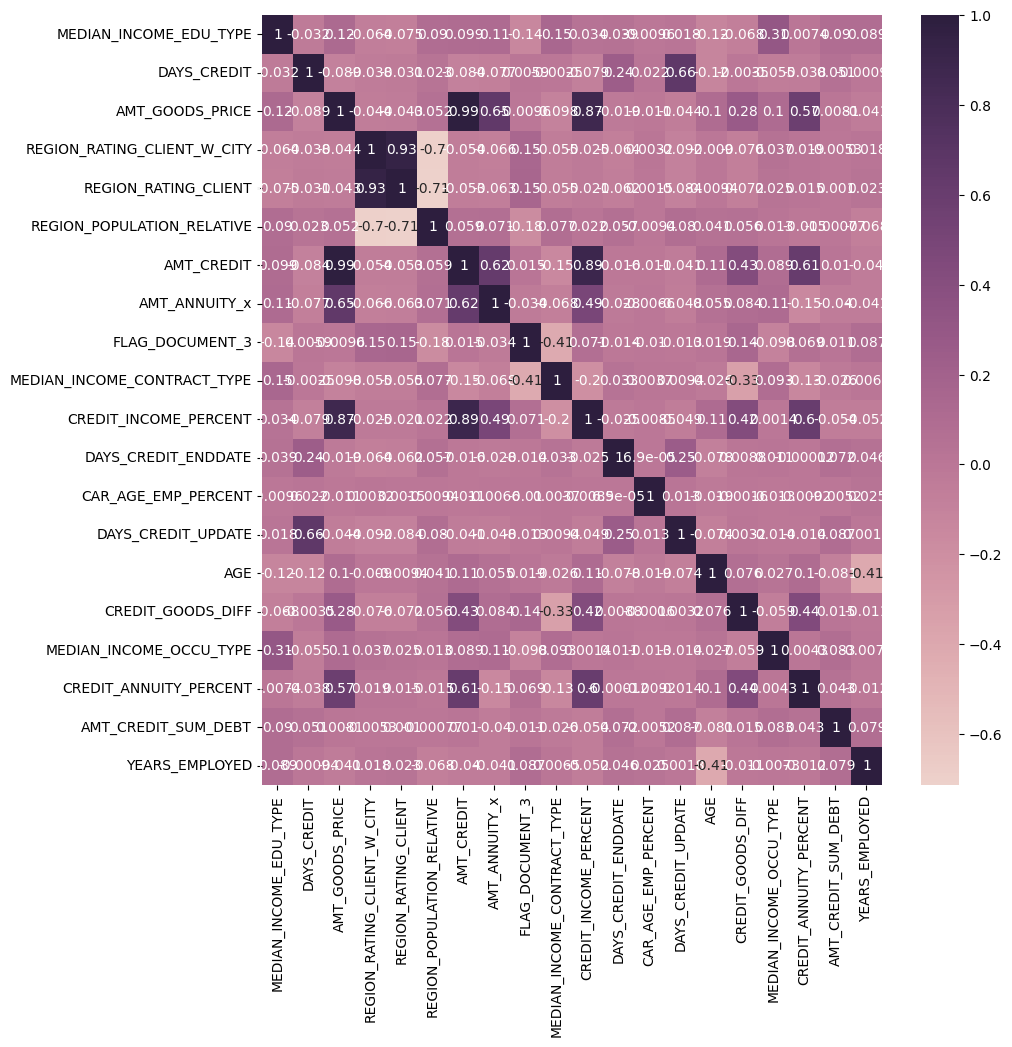

In [ ]:
# calculate pair-wise correlations between them
corrmat = customer_loan_data_X_numeric[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

In [ ]:
threshold = 0.7

sorted_corr = corrmat.abs().unstack().sort_values(ascending=False)
sorted_corr = sorted_corr[(sorted_corr >= threshold) & (sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1))]

sorted_corr_df = sorted_corr.reset_index()
sorted_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']
sorted_corr_df

,Variable 1,Variable 2,Correlation
0,AMT_CREDIT,AMT_GOODS_PRICE,0.986877
1,AMT_GOODS_PRICE,AMT_CREDIT,0.986877
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.934423
3,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.934423
4,CREDIT_INCOME_PERCENT,AMT_CREDIT,0.890356
5,AMT_CREDIT,CREDIT_INCOME_PERCENT,0.890356
6,CREDIT_INCOME_PERCENT,AMT_GOODS_PRICE,0.870908
7,AMT_GOODS_PRICE,CREDIT_INCOME_PERCENT,0.870908
8,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.713145
9,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.713145


In [ ]:
columns_to_drop = [
    'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'
]
scorecard_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
scorecard_data.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AGE,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,AMT_CREDIT_SUM_DEBT,YEARS_EMPLOYED,CREDIT_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOODS_DIFF,CAR_AGE_EMP_PERCENT,MEDIAN_INCOME_CONTRACT_TYPE,MEDIAN_INCOME_OCCU_TYPE,MEDIAN_INCOME_EDU_TYPE
0,0,Cash loans,1530000.0,42075.0,1530000.0,Higher education,0.003122,Managers,Other,1,51,-1939.500000,-119.500000,-578.000000,348007.50,1.229295,4.250000,36.363636,0.0,6.507795,391500.0,436500.0,405000.0
1,0,Cash loans,497520.0,32521.5,450000.0,Secondary / secondary special,0.020713,Sales staff,Self-employed,1,30,-679.000000,899.000000,-314.666667,3477814.38,11.789185,1.105600,15.298187,47520.0,0.691298,391500.0,382500.0,382500.0
2,0,Cash loans,733315.5,39069.0,679500.0,Secondary / secondary special,0.015221,Drivers,Self-employed,0,32,-641.444444,126.625000,-372.111111,2438748.00,5.639973,2.036987,18.769754,53815.5,0.531917,391500.0,371250.0,382500.0
3,0,Cash loans,1506816.0,49927.5,1350000.0,Secondary / secondary special,0.010006,Laborers,Transport: type 2,1,50,-1112.583333,129.164286,-465.888889,755028.00,26.072553,4.185600,30.180081,156816.0,0.115064,391500.0,360000.0,382500.0
4,0,Cash loans,675000.0,34596.0,675000.0,Higher education,0.026392,Managers,Services,1,51,-639.400000,-154.400000,-306.600000,980784.00,19.101985,1.250000,19.510926,0.0,0.366454,391500.0,436500.0,405000.0


In [ ]:
scorecard_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AGE',
       'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE',
       'AMT_CREDIT_SUM_DEBT', 'YEARS_EMPLOYED', 'CREDIT_INCOME_PERCENT',
       'CREDIT_ANNUITY_PERCENT', 'CREDIT_GOODS_DIFF', 'CAR_AGE_EMP_PERCENT',
       'MEDIAN_INCOME_CONTRACT_TYPE', 'MEDIAN_INCOME_OCCU_TYPE',
       'MEDIAN_INCOME_EDU_TYPE'],
      dtype='object')

In [ ]:
scorecard_data.shape[1]

23

In [ ]:
top30_iv.columns

Index(['variable', 'iv'], dtype='object')

In [ ]:
top30_iv

,variable,iv
124,YEARS_EMPLOYED,0.136924
31,NAME_EDUCATION_TYPE,0.118341
118,CAR_AGE_EMP_PERCENT,0.118320
60,CREDIT_ANNUITY_PERCENT,0.117660
5,ORGANIZATION_TYPE,0.116782
6,AMT_GOODS_PRICE,0.107900
93,MEDIAN_INCOME_EDU_TYPE,0.096835
114,DAYS_CREDIT,0.095426
79,AMT_CREDIT,0.092417
121,OCCUPATION_TYPE,0.086026


In [ ]:
# List of variables you want to keep
variables_to_keep = ['NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3',
       'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE',
       'AMT_CREDIT_SUM_DEBT', 'YEARS_EMPLOYED', 'CREDIT_INCOME_PERCENT',
       'CREDIT_ANNUITY_PERCENT', 'CREDIT_GOODS_DIFF', 'CAR_AGE_EMP_PERCENT',
       'MEDIAN_INCOME_CONTRACT_TYPE', 'MEDIAN_INCOME_OCCU_TYPE',
       'MEDIAN_INCOME_EDU_TYPE']

# Filter IV values based on variables to keep
filtered_iv = top30_iv[top30_iv['variable'].isin(variables_to_keep)]

filtered_iv

,variable,iv
124,YEARS_EMPLOYED,0.136924
31,NAME_EDUCATION_TYPE,0.118341
118,CAR_AGE_EMP_PERCENT,0.118320
60,CREDIT_ANNUITY_PERCENT,0.117660
5,ORGANIZATION_TYPE,0.116782
6,AMT_GOODS_PRICE,0.107900
93,MEDIAN_INCOME_EDU_TYPE,0.096835
114,DAYS_CREDIT,0.095426
79,AMT_CREDIT,0.092417
121,OCCUPATION_TYPE,0.086026


In [ ]:
keep_list = [
    'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
    'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 
    'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 
    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
    'ORGANIZATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 
    'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 
    'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 
    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 
    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'DAYS_CREDIT', 
    'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE', 
    'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 
    'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY_y', 'YEARS_EMPLOYED', 'CREDIT_INCOME_PERCENT', 
    'ANNUITY_INCOME_PERCENT', 'CREDIT_ANNUITY_PERCENT', 'FAMILY_CNT_INCOME_PERCENT', 'CREDIT_GOODS_DIFF', 
    'AGE_LOAN_FINISH', 'CAR_AGE_EMP_PERCENT', 'MEDIAN_INCOME_CONTRACT_TYPE', 'MEDIAN_INCOME_HOUSING_TYPE', 
    'MEDIAN_INCOME_ORG_TYPE', 'MEDIAN_INCOME_OCCU_TYPE', 'MEDIAN_INCOME_EDU_TYPE', 'ORG_TYPE_INCOME_PERCENT', 
    'OCCU_TYPE_INCOME_PERCENT', 'EDU_TYPE_INCOME_PERCENT'
]


#top 15 plus age
final_list = [ "TARGET","AGE",'YEARS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'CAR_AGE_EMP_PERCENT', 
    'ORGANIZATION_TYPE', 'AMT_GOODS_PRICE',  'DAYS_CREDIT',
    'AMT_CREDIT', 'OCCUPATION_TYPE', 'REGION_POPULATION_RELATIVE', 'AMT_ANNUITY_x',
    'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE']

drop_list1 = [col for col in app_data.columns if col not in final_list]
final_data = app_data.drop(columns=drop_list1,inplace=False)


In [ ]:
final_data.head()

,TARGET,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,YEARS_EMPLOYED,CAR_AGE_EMP_PERCENT
0,0,1530000.0,42075.0,1530000.0,Higher education,0.003122,Managers,Other,51,-1939.500000,-119.500,-578.000000,1.229295,6.507795
1,0,497520.0,32521.5,450000.0,Secondary / secondary special,0.020713,Sales staff,Self-employed,30,-679.000000,899.000,-314.666667,11.789185,0.691298
2,0,733315.5,39069.0,679500.0,Secondary / secondary special,0.015221,Drivers,Self-employed,32,-641.444444,126.625,-372.111111,5.639973,0.531917
3,0,1506816.0,49927.5,1350000.0,Secondary / secondary special,0.010006,Laborers,Transport: type 2,50,NaN,NaN,NaN,26.072553,0.115064
4,0,675000.0,34596.0,675000.0,Higher education,0.026392,Managers,Services,51,-639.400000,-154.400,-306.600000,19.101985,0.366454


In [ ]:
bins = sc.woebin(final_data, y='TARGET')



[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ORGANIZATION_TYPE
>>> Continue the binning process?
1: yes 
2: no
Binning on 15825 rows and 14 columns in 00:08:35


In [ ]:
iv_data_final = []

for variables , bindetails in bins.items():
    iv_data_final.append({'variable': variables, 'iv': round(bindetails['total_iv'][0], 6)})
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,"Low-skill Laborers%,%Private service staff%,%I...",3432,0.216872,3300,132,0.038462,-0.446421,0.035617,0.086026,"Low-skill Laborers%,%Private service staff%,%I...",False
1,OCCUPATION_TYPE,"Other%,%Secretaries",3764,0.237852,3580,184,0.048884,-0.195728,0.008363,0.086026,"Other%,%Secretaries",False
2,OCCUPATION_TYPE,"Managers%,%Medicine staff%,%Realty agents",4755,0.300474,4464,291,0.061199,0.041977,0.000539,0.086026,"Managers%,%Medicine staff%,%Realty agents",False
3,OCCUPATION_TYPE,"Sales staff%,%Laborers%,%Security staff%,%Cook...",3874,0.244803,3550,324,0.083634,0.378495,0.041506,0.086026,"Sales staff%,%Laborers%,%Security staff%,%Cook...",False


----------------------------------------------------------------------------------------------------
YEARS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_EMPLOYED,"[-inf,0.0)",1240,0.078357,1175,65,0.052419,-0.122182,1.108607e-03,0.136924,0.0,False
1,YEARS_EMPLOYED,"[0.0,3.0)",4223,0.266856,3849,374,0.088563,0.441142,6.321222e-02,0.136924,3.0,False
2,YEARS_EMPLOYED,"[3.0,7.0)",4701,0.297062,4424,277,0.058924,0.001672,8.314833e-07,0.136924,7.0,False
3,YEARS_EMPLOYED,"[7.0,11.5)",2966,0.187425,2834,132,0.044504,-0.294188,1.426663e-02,0.136924,11.5,False
4,YEARS_EMPLOYED,"[11.5,inf)",2695,0.170300,2612,83,0.030798,-0.676576,5.833522e-02,0.136924,inf,False


----------------------------------------------------------------------------------------------------
AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE,"[-inf,31.0)",1878,0.118673,1729,149,0.079340,0.321102,0.014114,0.046584,31.0,False
1,AGE,"[31.0,35.0)",1855,0.117220,1728,127,0.068464,0.161922,0.003302,0.046584,35.0,False
2,AGE,"[35.0,39.0)",2208,0.139526,2082,126,0.057065,-0.032348,0.000144,0.046584,39.0,False
3,AGE,"[39.0,41.0)",1136,0.071785,1090,46,0.040493,-0.392837,0.009340,0.046584,41.0,False
4,AGE,"[41.0,52.0)",5350,0.338073,5024,326,0.060935,0.037370,0.000480,0.046584,52.0,False
5,AGE,"[52.0,54.0)",804,0.050806,778,26,0.032338,-0.626176,0.015222,0.046584,54.0,False
6,AGE,"[54.0,inf)",2594,0.163918,2463,131,0.050501,-0.161484,0.003982,0.046584,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Higher education%,%Lower secondary",8473,0.535419,8124,349,0.041190,-0.375052,0.063980,0.118341,"Higher education%,%Lower secondary",False
1,NAME_EDUCATION_TYPE,"Academic degree%,%Secondary / secondary specia...",7352,0.464581,6770,582,0.079162,0.318669,0.054361,0.118341,"Academic degree%,%Secondary / secondary specia...",False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,650000.0)",4507,0.284803,4146,361,0.080098,0.331433,0.036255,0.092417,650000.0,False
1,AMT_CREDIT,"[650000.0,800000.0)",2060,0.130174,1921,139,0.067476,0.146327,0.002974,0.092417,800000.0,False
2,AMT_CREDIT,"[800000.0,1350000.0)",5695,0.359874,5391,304,0.053380,-0.103004,0.003649,0.092417,1350000.0,False
3,AMT_CREDIT,"[1350000.0,inf)",3563,0.225150,3436,127,0.035644,-0.525422,0.049539,0.092417,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT_ENDDATE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT_ENDDATE,missing,1689,0.106730,1580,109,0.064535,0.098622,0.001084,0.072489,missing,True
1,DAYS_CREDIT_ENDDATE,"[-inf,-600.0)",2801,0.176998,2701,100,0.035702,-0.523753,0.038725,0.072489,-600.0,False
2,DAYS_CREDIT_ENDDATE,"[-600.0,200.0)",4648,0.293712,4408,240,0.051635,-0.138083,0.005271,0.072489,200.0,False
3,DAYS_CREDIT_ENDDATE,"[200.0,3000.0)",4842,0.305972,4515,327,0.067534,0.147254,0.007082,0.072489,3000.0,False
4,DAYS_CREDIT_ENDDATE,"[3000.0,inf)",1845,0.116588,1690,155,0.084011,0.383396,0.020327,0.072489,inf,False


----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORGANIZATION_TYPE,"Industry: type 10%,%Postal%,%Industry: type 6%...",1748,0.110458,1705,43,0.024600,-0.907666,0.061983,0.116782,"Industry: type 10%,%Postal%,%Industry: type 6%...",False
1,ORGANIZATION_TYPE,"Industry: type 12%,%Transport: type 2%,%Indust...",2543,0.160695,2438,105,0.041290,-0.372519,0.018964,0.116782,"Industry: type 12%,%Transport: type 2%,%Indust...",False
2,ORGANIZATION_TYPE,"Other%,%XNA%,%Trade: type 3%,%Telecom%,%Culture",2340,0.147867,2219,121,0.051709,-0.136567,0.002597,0.116782,"Other%,%XNA%,%Trade: type 3%,%Telecom%,%Culture",False
3,ORGANIZATION_TYPE,"Advertising%,%Insurance%,%Industry: type 7%,%I...",8288,0.523728,7705,583,0.070343,0.191017,0.020799,0.116782,"Advertising%,%Insurance%,%Industry: type 7%,%I...",False
4,ORGANIZATION_TYPE,"Restaurant%,%Construction%,%Trade: type 6%,%In...",906,0.057251,827,79,0.087196,0.424098,0.012438,0.116782,"Restaurant%,%Construction%,%Trade: type 6%,%In...",False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT_UPDATE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT_UPDATE,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.065947,missing,True
1,DAYS_CREDIT_UPDATE,"[-inf,-1000.0)",1426,0.090111,1381,45,0.031557,-0.651446,0.028916,0.065947,-1000.0,False
2,DAYS_CREDIT_UPDATE,"[-1000.0,-700.0)",2411,0.152354,2306,105,0.043550,-0.316855,0.013322,0.065947,-700.0,False
3,DAYS_CREDIT_UPDATE,"[-700.0,-300.0)",5843,0.369226,5506,337,0.057676,-0.021056,0.000162,0.065947,-300.0,False
4,DAYS_CREDIT_UPDATE,"[-300.0,inf)",4562,0.288278,4218,344,0.075406,0.265980,0.022952,0.065947,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT,missing,1583,0.100032,1483,100,0.063171,0.075802,0.000594,0.095426,missing,True
1,DAYS_CREDIT,"[-inf,-1300.0)",5007,0.316398,4810,197,0.039345,-0.422794,0.047077,0.095426,-1300.0,False
2,DAYS_CREDIT,"[-1300.0,-1000.0)",3353,0.211880,3175,178,0.053087,-0.108825,0.002392,0.095426,-1000.0,False
3,DAYS_CREDIT,"[-1000.0,-750.0)",2430,0.153555,2270,160,0.065844,0.120093,0.002336,0.095426,-750.0,False
4,DAYS_CREDIT,"[-750.0,inf)",3452,0.218136,3156,296,0.085747,0.405753,0.043026,0.095426,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.036000000000000004)",11419,0.721580,10645,774,0.067782,0.151181,0.017635,0.083961,0.036000000000000004,False
1,REGION_POPULATION_RELATIVE,"[0.036000000000000004,0.047)",2155,0.136177,2067,88,0.040835,-0.384062,0.016998,0.083961,0.047,False
2,REGION_POPULATION_RELATIVE,"[0.047,inf)",2251,0.142243,2182,69,0.030653,-0.681436,0.049328,0.083961,inf,False


----------------------------------------------------------------------------------------------------
CAR_AGE_EMP_PERCENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CAR_AGE_EMP_PERCENT,"[-inf,1.6)",9626,0.608278,9204,422,0.043840,-0.309934,0.051043,0.11832,1.6,False
1,CAR_AGE_EMP_PERCENT,"[1.6,4.6000000000000005)",3831,0.242085,3547,284,0.074132,0.247571,0.016562,0.11832,4.6000000000000005,False
2,CAR_AGE_EMP_PERCENT,"[4.6000000000000005,inf)",2368,0.149637,2143,225,0.095017,0.518593,0.050714,0.11832,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY_x  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY_x,"[-inf,32000.0)",4519,0.285561,4180,339,0.075017,0.260388,0.021736,0.079393,32000.0,False
1,AMT_ANNUITY_x,"[32000.0,44000.0)",4158,0.262749,3891,267,0.064214,0.093282,0.002383,0.079393,44000.0,False
2,AMT_ANNUITY_x,"[44000.0,64000.0)",5027,0.317662,4765,262,0.052119,-0.128254,0.004939,0.079393,64000.0,False
3,AMT_ANNUITY_x,"[64000.0,inf)",2121,0.134028,2058,63,0.029703,-0.713901,0.050335,0.079393,inf,False


----------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_GOODS_PRICE,"[-inf,500000.0)",4061,0.256619,3726,335,0.082492,0.363494,0.039861,0.1079,500000.0,False
1,AMT_GOODS_PRICE,"[500000.0,700000.0)",2752,0.173902,2560,192,0.069767,0.182187,0.006258,0.1079,700000.0,False
2,AMT_GOODS_PRICE,"[700000.0,1350000.0)",5706,0.360569,5414,292,0.051174,-0.147535,0.007356,0.1079,1350000.0,False
3,AMT_GOODS_PRICE,"[1350000.0,inf)",3306,0.208910,3194,112,0.033878,-0.578076,0.054425,0.1079,inf,False


----------------------------------------------------------------------------------------------------


In [ ]:
# Sort data with highest IV
iv_df_final = pd.DataFrame(iv_data_final)
iv_df_final.sort_values(by=['iv'], ascending=False)

,variable,iv
1,YEARS_EMPLOYED,0.136924
3,NAME_EDUCATION_TYPE,0.118341
10,CAR_AGE_EMP_PERCENT,0.118320
6,ORGANIZATION_TYPE,0.116782
12,AMT_GOODS_PRICE,0.107900
8,DAYS_CREDIT,0.095426
4,AMT_CREDIT,0.092417
0,OCCUPATION_TYPE,0.086026
9,REGION_POPULATION_RELATIVE,0.083961
11,AMT_ANNUITY_x,0.079393


{'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'YEARS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'AGE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>,
 'DAYS_CREDIT_ENDDATE': <Figure size 640x480 with 2 Axes>,
 'ORGANIZATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'DAYS_CREDIT_UPDATE': <Figure size 640x480 with 2 Axes>,
 'DAYS_CREDIT': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'CAR_AGE_EMP_PERCENT': <Figure size 640x480 with 2 Axes>,
 'AMT_ANNUITY_x': <Figure size 640x480 with 2 Axes>,
 'AMT_GOODS_PRICE': <Figure size 640x480 with 2 Axes>}

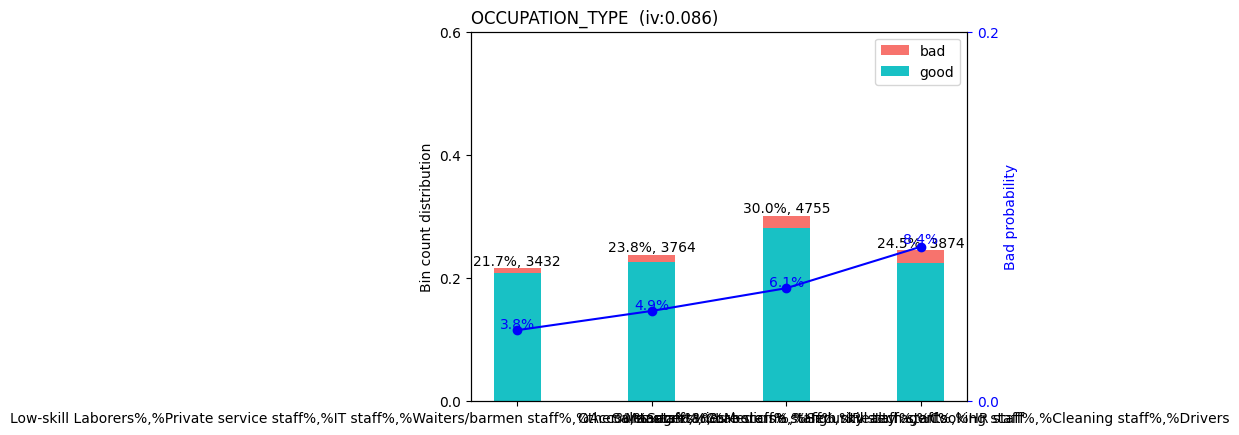

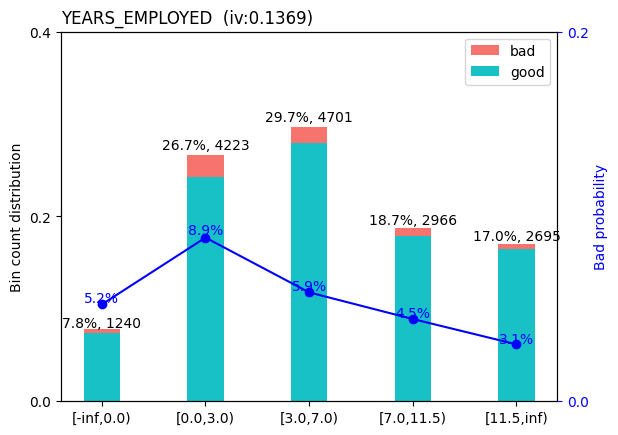

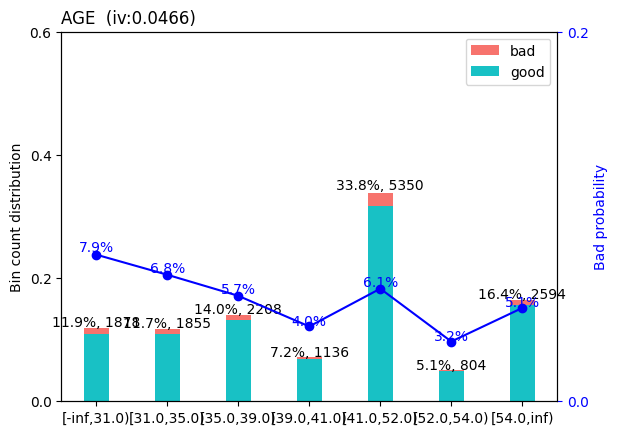

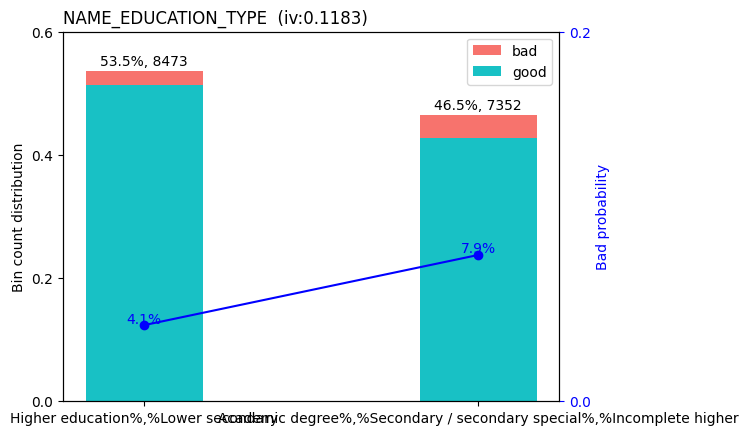

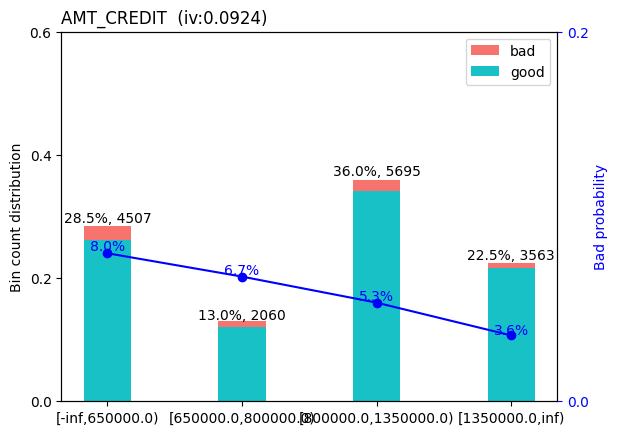

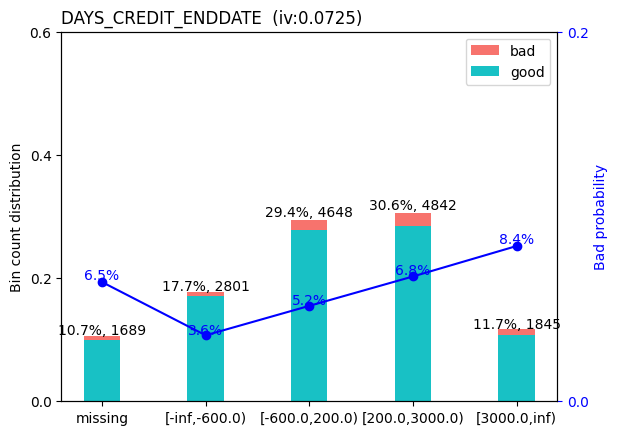

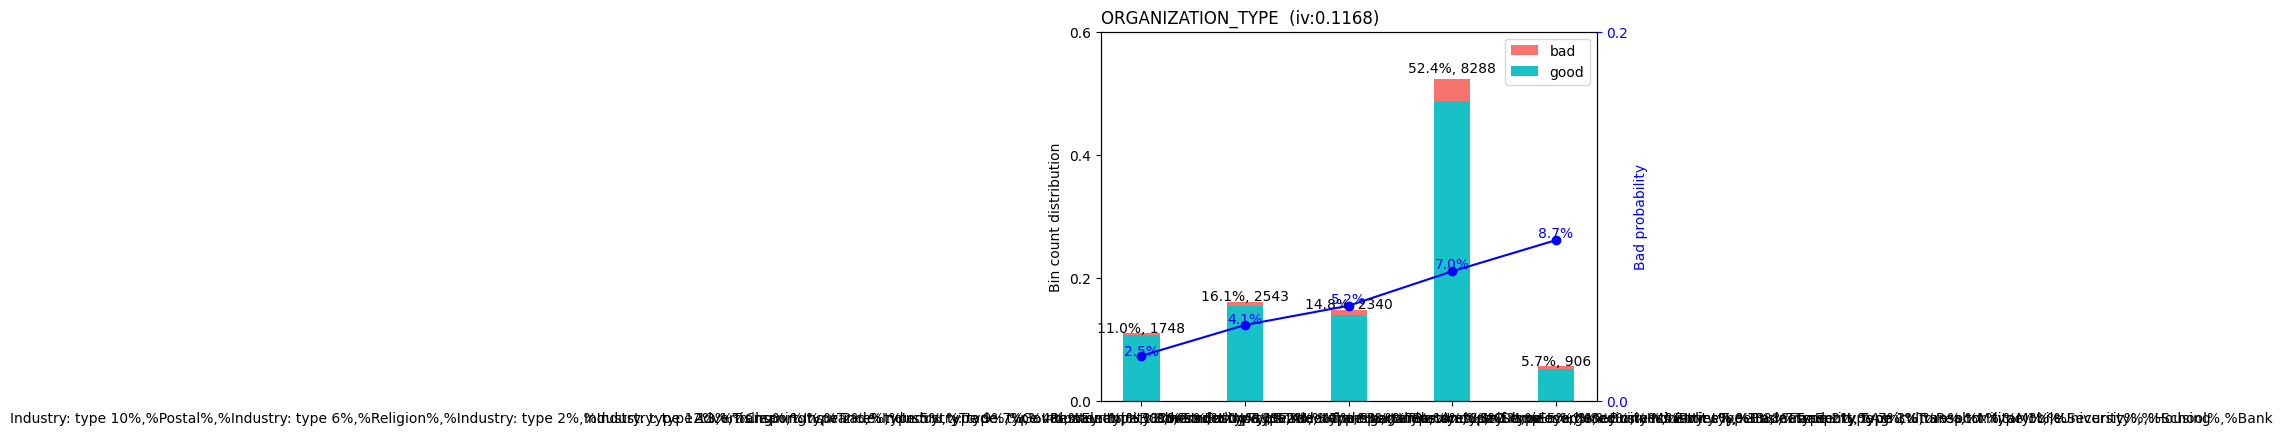

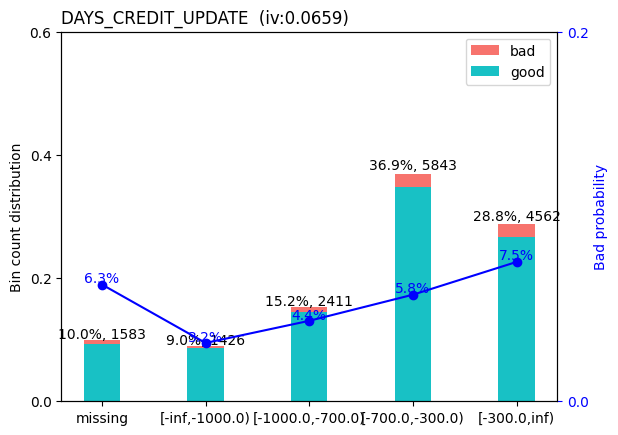

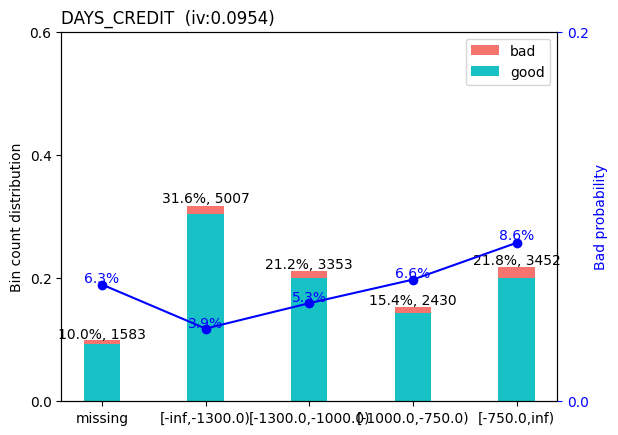

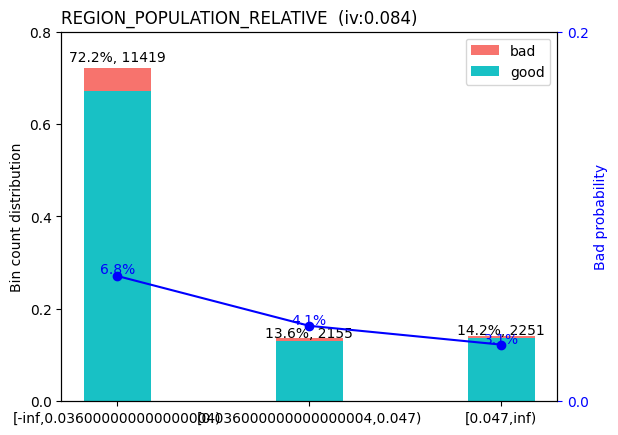

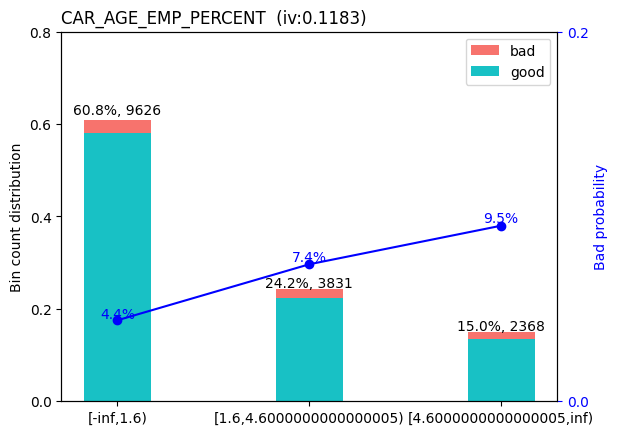

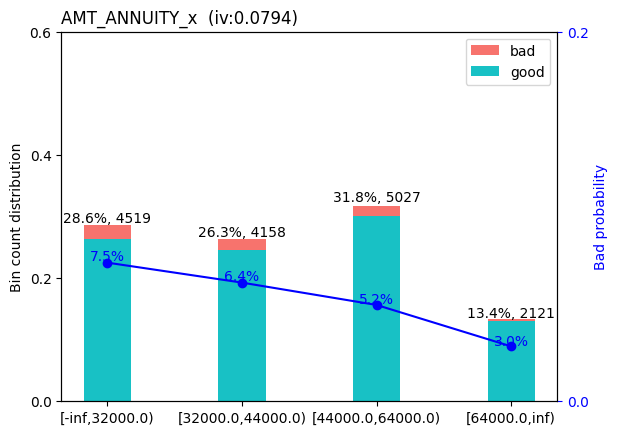

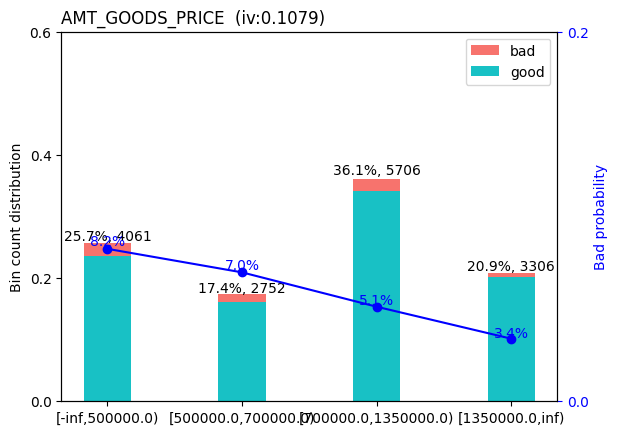

In [ ]:
sc.woebin_plot(bins)

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ORGANIZATION_TYPE
>>> Continue the binning process?
1: yes 
2: no
Binning on 15825 rows and 14 columns in 00:00:22


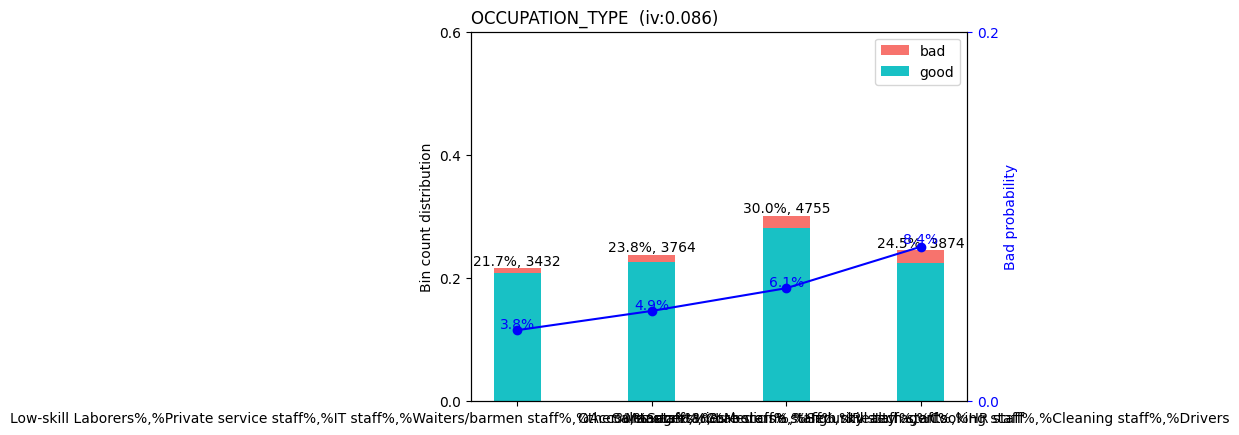

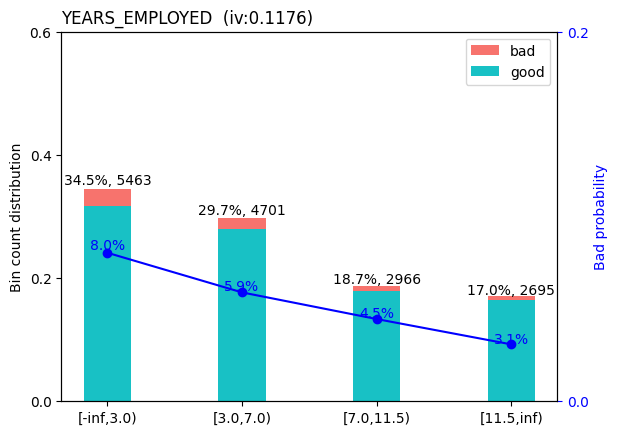

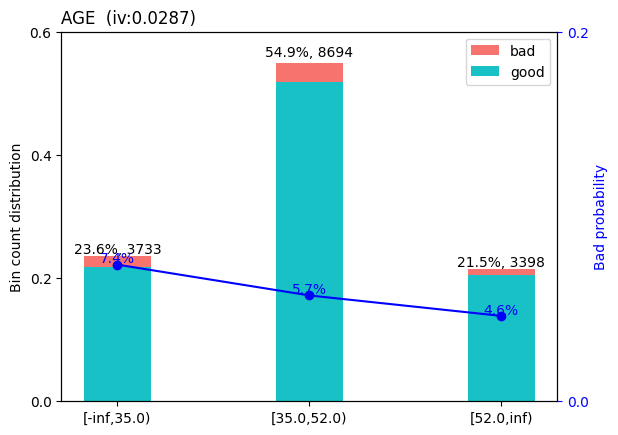

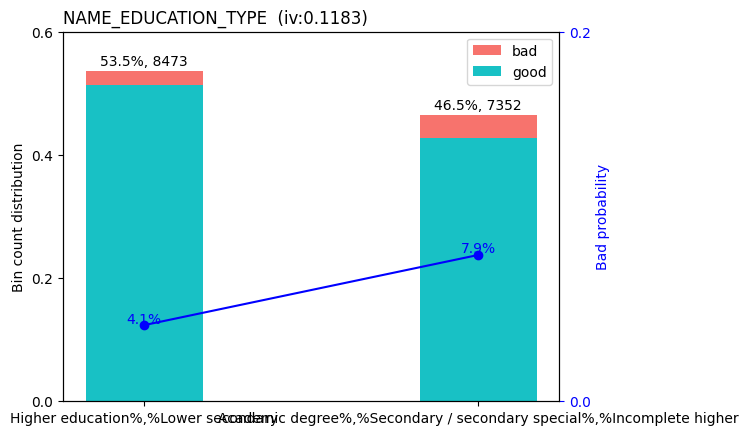

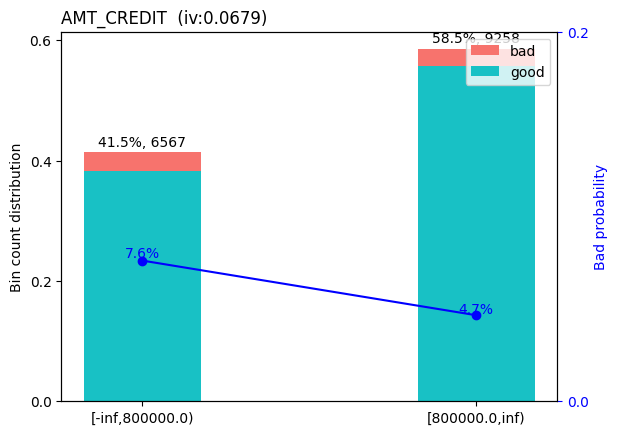

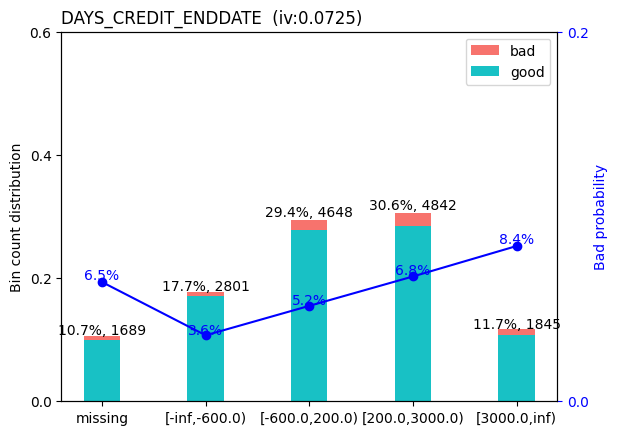

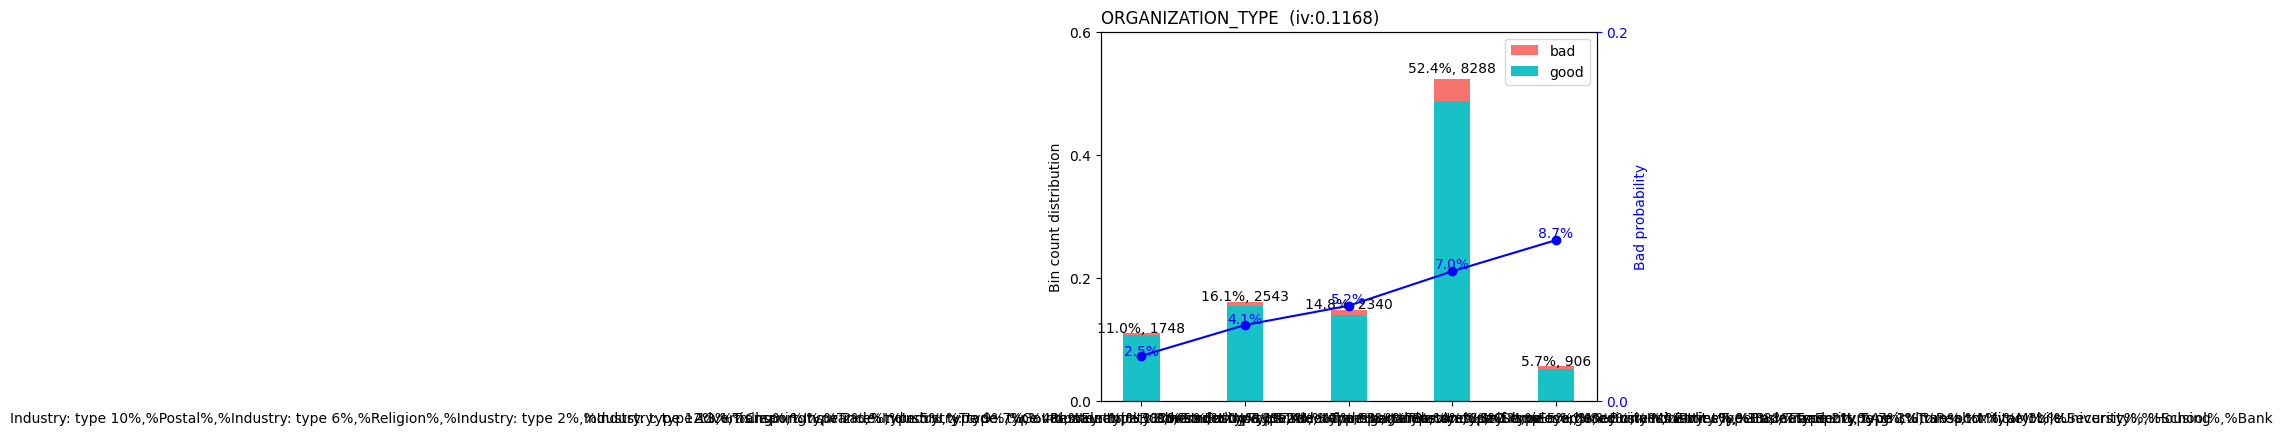

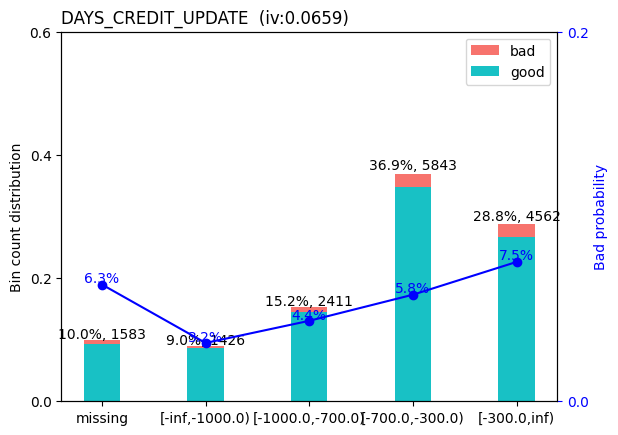

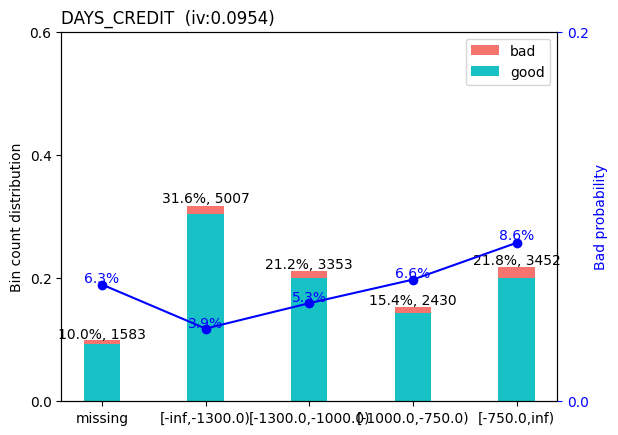

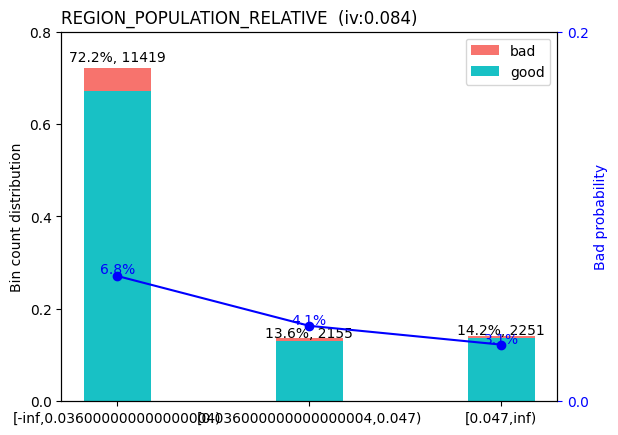

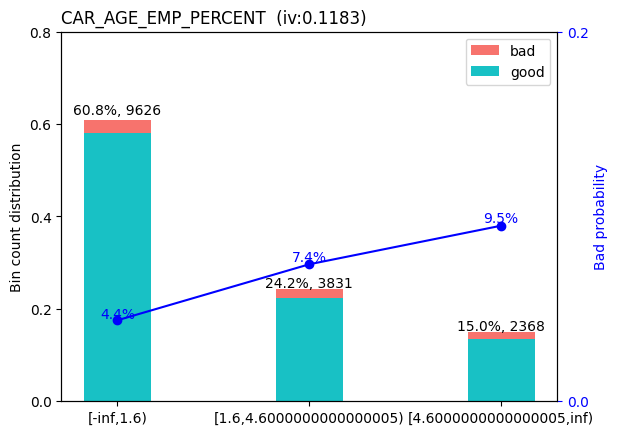

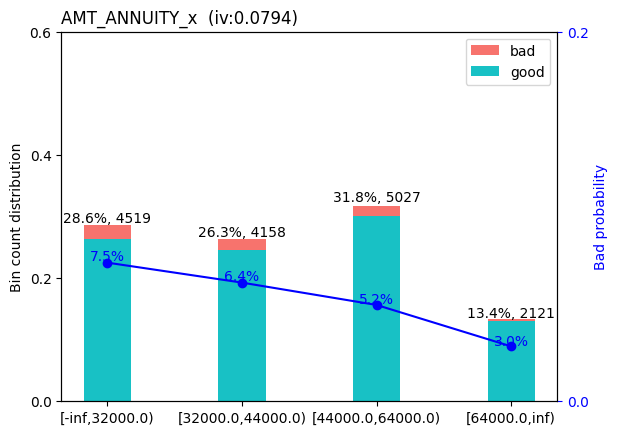

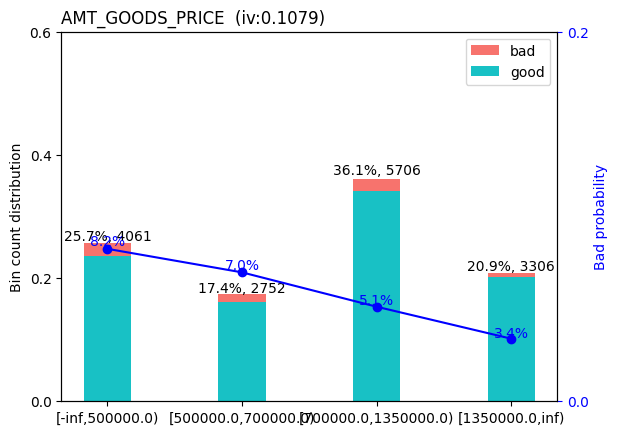

In [ ]:
# bin adjustments
breaks_adj = {
    "AGE" : [-np.inf, 35.0, 52.0, np.inf],
    "YEARS_EMPLOYED" : [-np.inf, 3.0, 7.0, 11.5, np.inf],
    "AMT_CREDIT" : [-np.inf, 800000.0, np.inf]
}


bins3 = sc.woebin(final_data, y = "TARGET", breaks_list = breaks_adj)
sc.woebin_plot(bins3);

In [ ]:
train, test = sc.split_df(final_data, 'TARGET', ratio=0.7).values()

In [ ]:
train_woe = sc.woebin_ply(train, bins3)
test_woe = sc.woebin_ply(test, bins3)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,OCCUPATION_TYPE_woe,YEARS_EMPLOYED_woe,AGE_woe,NAME_EDUCATION_TYPE_woe,AMT_CREDIT_woe,DAYS_CREDIT_ENDDATE_woe,DAYS_CREDIT_UPDATE_woe,DAYS_CREDIT_woe,REGION_POPULATION_RELATIVE_woe,CAR_AGE_EMP_PERCENT_woe,AMT_ANNUITY_x_woe,AMT_GOODS_PRICE_woe,ORGANIZATION_TYPE_woe
0,0,0.041977,0.334972,-0.028347,-0.375052,-0.247008,-0.138083,-0.021056,-0.422794,0.151181,0.518593,0.093282,-0.578076,-0.136567
3,0,0.378495,-0.676576,-0.028347,0.318669,-0.247008,0.098622,0.075802,0.075802,0.151181,-0.309934,-0.128254,-0.578076,-0.372519
4,0,0.041977,-0.676576,-0.028347,-0.375052,0.276443,-0.138083,-0.021056,0.405753,0.151181,-0.309934,0.093282,0.182187,-0.907666
6,0,0.041977,0.001672,-0.254937,-0.375052,-0.247008,-0.138083,-0.021056,-0.422794,0.151181,-0.309934,-0.128254,-0.147535,0.191017
8,0,-0.446421,-0.676576,-0.028347,-0.375052,0.276443,0.147254,-0.021056,-0.422794,0.151181,-0.309934,0.260388,0.363494,-0.372519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15818,0,0.041977,0.001672,-0.028347,-0.375052,0.276443,0.098622,0.075802,0.075802,-0.681436,-0.309934,-0.128254,0.182187,0.191017
15820,0,0.378495,0.334972,-0.028347,0.318669,0.276443,-0.523753,-0.651446,-0.422794,0.151181,0.518593,0.260388,0.182187,-0.372519
15821,0,0.041977,0.334972,-0.028347,-0.375052,0.276443,-0.138083,-0.021056,-0.422794,0.151181,0.247571,0.093282,0.182187,-0.372519
15822,0,0.041977,0.334972,-0.028347,0.318669,0.276443,0.098622,0.075802,0.075802,0.151181,-0.309934,0.093282,0.363494,0.191017


In [ ]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.45919331 0.48064563 0.38275533 0.6585764  0.1252641  0.69367073
  0.2611122  0.27385606 0.8274134  0.46001529 0.48377452 0.54149491
  0.83325345]]
[-2.77617333]


# Balancing

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4747
           1       0.00      0.00      0.00         0

    accuracy                           0.94      4747
   macro avg       0.50      0.47      0.48      4747
weighted avg       1.00      0.94      0.97      4747



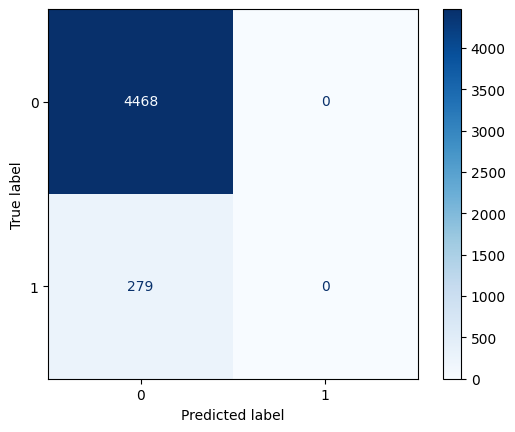

<AxesSubplot: >

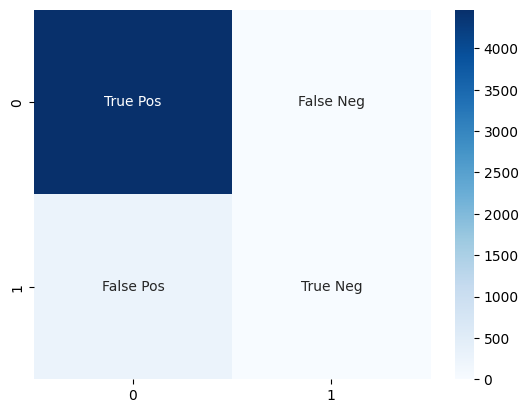

In [ ]:
# Generate model predictions on test data. Print Evaluation metrics of the model
y_pred = lr.predict(X_test)

print(classification_report(y_pred, y_test))

plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
labels = ['True Pos','False Neg','False Pos','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues')

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.97      0.64      0.77      4468
           1       0.10      0.66      0.18       279

    accuracy                           0.64      4747
   macro avg       0.53      0.65      0.47      4747
weighted avg       0.92      0.64      0.73      4747



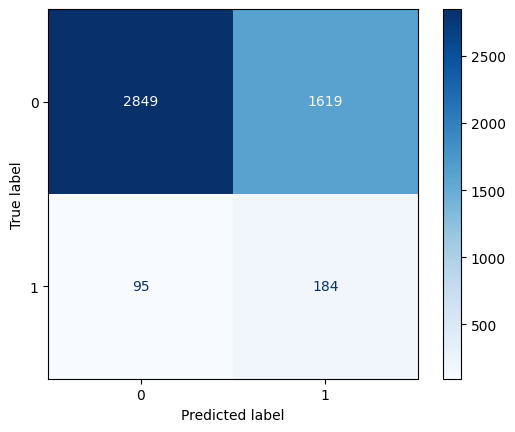

<AxesSubplot: >

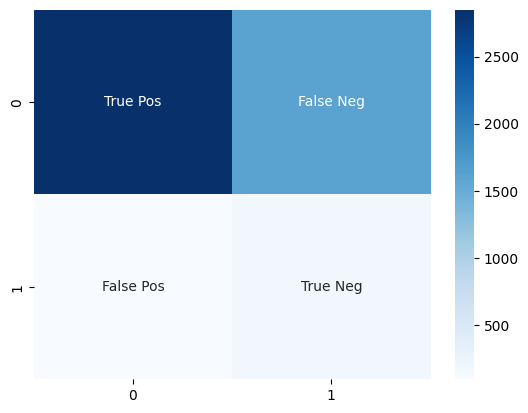

In [ ]:
#Testing 
lr_bal=LogisticRegression(random_state=42,class_weight='balanced')
lr_bal_model=lr_bal.fit(X_train,y_train)
y_pred_bal=lr_bal_model.predict(X_test)
print('Classification report for balanced classes \n',classification_report(y_test,y_pred_bal))

plot_confusion_matrix(lr_bal, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
labels = ['True Pos','False Neg','False Pos','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_bal), annot=labels, fmt='', cmap='Blues')

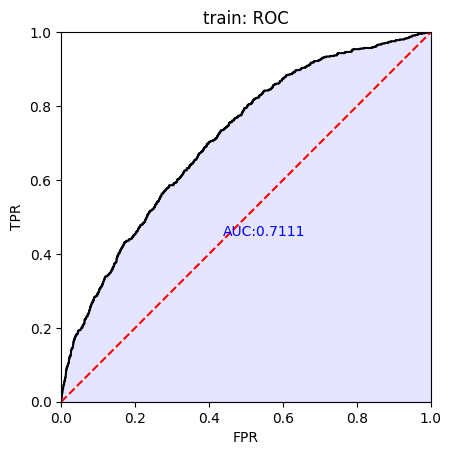

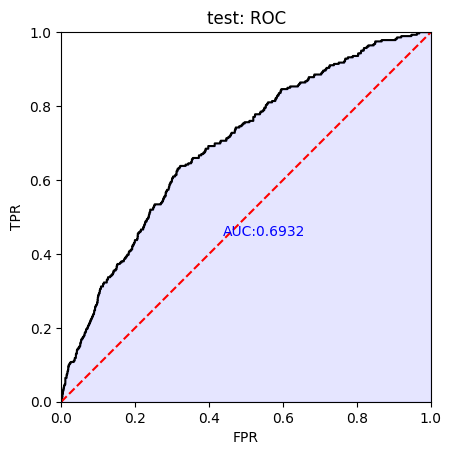

In [ ]:
# Calculate the predicted probabilities for class 1
train_pred_prob2 = lr_bal.predict_proba(X_train)[:, 1]
test_pred_prob2 = lr_bal.predict_proba(X_test)[:, 1]

train_perf2 = sc.perf_eva(y_train, train_pred_prob2, plot_type=['roc'], title='train')
test_perf2 = sc.perf_eva(y_test, test_pred_prob2, plot_type=['roc'], title='test')


## Custom Weightage ML Model


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4468
           1       0.23      0.06      0.10       279

    accuracy                           0.93      4747
   macro avg       0.59      0.53      0.53      4747
weighted avg       0.90      0.93      0.91      4747

[[4409   59]
 [ 261   18]]


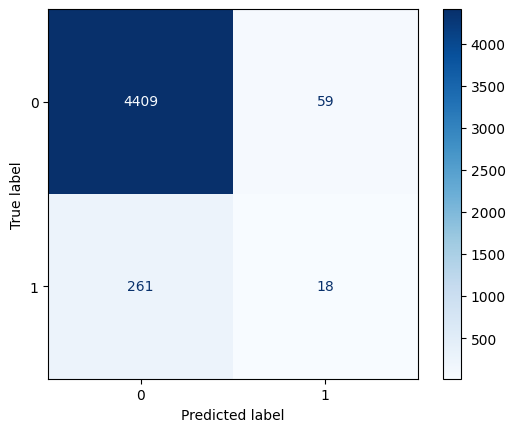

<AxesSubplot: >

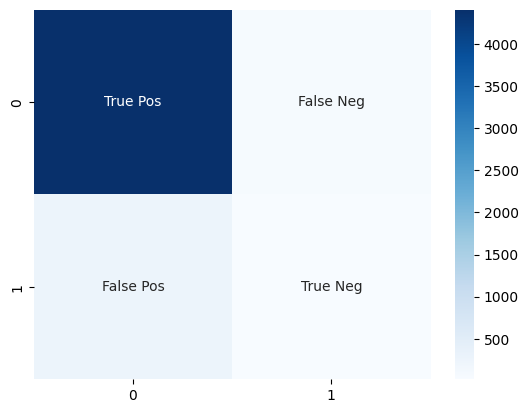

In [ ]:
#dict parameter for class weights
lr_bal3=LogisticRegression(random_state=42,class_weight={0: 0.2,1: 0.8}).fit(X_train,y_train)
y_pred_bal3=lr_bal3.predict(X_test)
print(classification_report(y_test,y_pred_bal3))
print(confusion_matrix(y_test,y_pred_bal3))

plot_confusion_matrix(lr_bal3, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
labels = ['True Pos','False Neg','False Pos','True Neg']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_bal3), annot=labels, fmt='', cmap='Blues')

In [ ]:
# generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(bins3, lr_bal3, X_train.columns, points0 = 500, odds0 = 1/20, pdo = 40, basepoints_eq0 = True)
print(type(card)) # card is a dictionary
pprint.pprint(card)

<class 'dict'>
{'AGE':    variable          bin  points
8       AGE  [-inf,35.0)    26.0
9       AGE  [35.0,52.0)    32.0
10      AGE   [52.0,inf)    37.0,
 'AMT_ANNUITY_x':          variable                bin  points
41  AMT_ANNUITY_x     [-inf,32000.0)    24.0
42  AMT_ANNUITY_x  [32000.0,44000.0)    29.0
43  AMT_ANNUITY_x  [44000.0,64000.0)    35.0
44  AMT_ANNUITY_x      [64000.0,inf)    51.0,
 'AMT_CREDIT':       variable              bin  points
13  AMT_CREDIT  [-inf,800000.0)    30.0
14  AMT_CREDIT   [800000.0,inf)    33.0,
 'AMT_GOODS_PRICE':            variable                   bin  points
45  AMT_GOODS_PRICE       [-inf,500000.0)    20.0
46  AMT_GOODS_PRICE   [500000.0,700000.0)    26.0
47  AMT_GOODS_PRICE  [700000.0,1350000.0)    36.0
48  AMT_GOODS_PRICE       [1350000.0,inf)    50.0,
 'CAR_AGE_EMP_PERCENT':                variable                       bin  points
38  CAR_AGE_EMP_PERCENT                [-inf,1.6)    39.0
39  CAR_AGE_EMP_PERCENT  [1.6,4.6000000000000005)    

In [ ]:
del card['basepoints']
print(card)

{'OCCUPATION_TYPE':           variable                                                bin  points
0  OCCUPATION_TYPE  Low-skill Laborers%,%Private service staff%,%I...    43.0
1  OCCUPATION_TYPE                                Other%,%Secretaries    36.0
2  OCCUPATION_TYPE          Managers%,%Medicine staff%,%Realty agents    30.0
3  OCCUPATION_TYPE  Sales staff%,%Laborers%,%Security staff%,%Cook...    21.0, 'YEARS_EMPLOYED':          variable         bin  points
4  YEARS_EMPLOYED  [-inf,3.0)    22.0
5  YEARS_EMPLOYED   [3.0,7.0)    31.0
6  YEARS_EMPLOYED  [7.0,11.5)    39.0
7  YEARS_EMPLOYED  [11.5,inf)    49.0, 'AGE':    variable          bin  points
8       AGE  [-inf,35.0)    26.0
9       AGE  [35.0,52.0)    32.0
10      AGE   [52.0,inf)    37.0, 'NAME_EDUCATION_TYPE':                variable                                                bin  \
11  NAME_EDUCATION_TYPE                 Higher education%,%Lower secondary   
12  NAME_EDUCATION_TYPE  Academic degree%,%Secondary / second

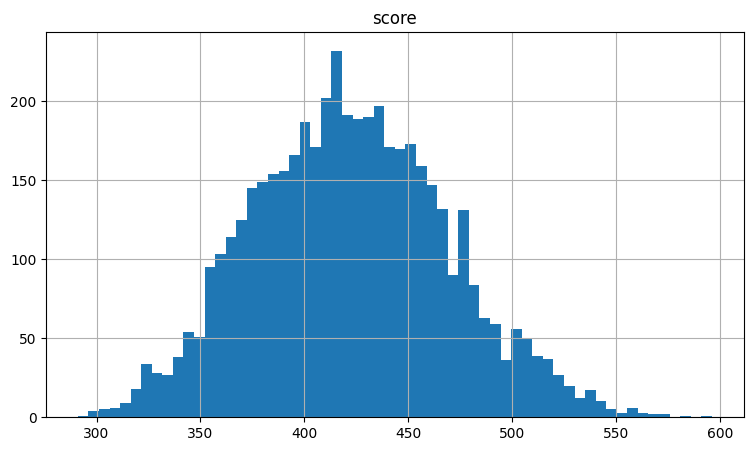

In [ ]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# plot the distrubution of scores on test data
test_score.hist(figsize=(9, 5),bins = 60);

In [ ]:
X_train

In [ ]:
(train_score >= 500).mean()

score    0.056599
dtype: float64

In [ ]:
train[(train_score >=500).to_numpy()]['TARGET'].mean()

# use this to subset our train dataset

0.01594896331738437

In [ ]:
test[(test_score >=500).to_numpy()]['TARGET'].mean()

# use this to subset our train dataset (grant the loan and still default)

0.010309278350515464

In [ ]:
# odds -> probability
1/(21)
#below cutoff which is good

0.047619047619047616

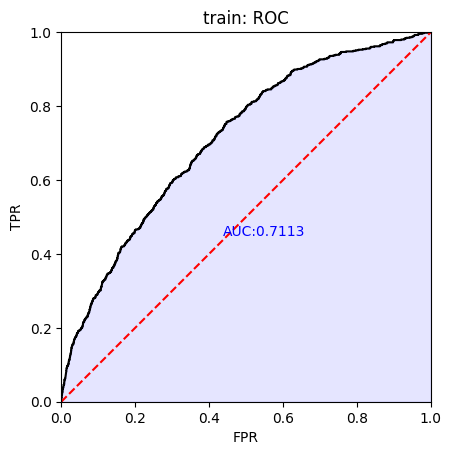

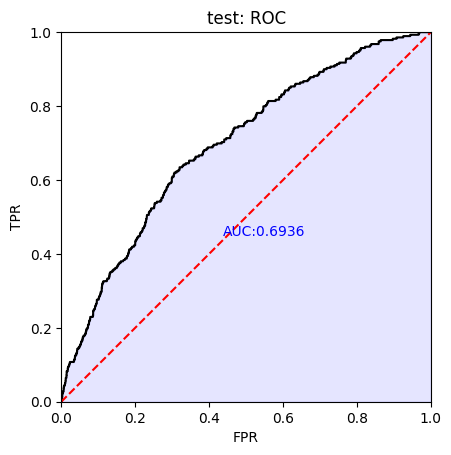

In [ ]:
# Calculate the predicted probabilities for class 1
train_pred_prob = lr_bal3.predict_proba(X_train)[:, 1]
test_pred_prob = lr_bal3.predict_proba(X_test)[:, 1]

train_perf = sc.perf_eva(y_train, train_pred_prob, plot_type=['roc'], title='train')
test_perf = sc.perf_eva(y_test, test_pred_prob, plot_type=['roc'], title='test')


In [ ]:
# Calculate the predicted probabilities for class 1
y_pred_prob = lr_bal3.predict_proba(X_test)[:, 1]

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the AUROC score
print('AUROC score:', roc_auc)

AUROC score: 0.6936386345915038


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cdcc90e8-36e0-414c-8ab5-29dde69de6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>